<h1 style="color: red; font-size: 48px; text-align: center;">
    Ensemble Learning-Based Parkinson’s Disease Detection 🧠
</h1>

<center>
    <img src="https://media2.giphy.com/media/QvBoMEcQ7DQXK/giphy.gif"
         alt="brain neural activity animation" height="250" width="500">
</center>


# 🧠 Ensemble Parkinson Predictor

# 👋 Introduction

<div style="background-color:#F4F9FF; padding:20px; border-radius:1.3em; font-family:verdana; font-size:20px; line-height:1.7em; border-left:8px solid #4A90E2;"> <p> Parkinson’s Disease is a progressive neurological disorder that affects movement, speech, and balance. Early detection plays a crucial role in improving patient outcomes and quality of life. Traditional diagnostic methods rely heavily on clinical observations and motor assessments, which may not always detect subtle early symptoms. </p> <p> This project, <strong>“🧠 Ensemble Parkinson Predictor”</strong>, applies advanced <strong>ensemble learning techniques</strong> such as Random Forest, Gradient Boosting, and Voting Classifiers to accurately predict the presence of Parkinson’s Disease based on biomedical voice measurements and patient features. </p> <p> By combining the strengths of multiple machine learning models, the system enhances diagnostic reliability, reduces prediction variance, and supports healthcare professionals in making data-driven decisions. </p> </div>

# 💡 Problem Statement
<div style="background-color:#FFF7E6; padding:20px; border-radius:1.3em; font-family:verdana; font-size:20px; line-height:1.7em; border-left:8px solid #F5A623;"> <p> Parkinson’s Disease is a complex neurodegenerative disorder that progressively impairs movement and coordination. Early symptoms are often subtle and easily overlooked, making early diagnosis challenging for clinicians. Traditional diagnostic methods depend heavily on manual examination, which can be subjective and time-consuming. </p> <p> The key problem addressed in this project is: <strong>How can machine learning models, particularly ensemble techniques, be used to accurately and efficiently predict Parkinson’s Disease using patient data?</strong> </p> <p> This study focuses on building an AI-driven prediction system that leverages multiple algorithms to enhance diagnostic accuracy, minimize </p></div>

# ⚙️ Feature Description
<div style="font-family:verdana; font-size:20px; line-height:1.7em; background-color:#F4FFF4; padding:20px; border-radius:1.3em; border-left:8px solid #27AE60;"> <ol> <li><p><strong><code>MDVP:Fo(Hz)</code></strong>: Average vocal fundamental frequency. Affects tone and pitch, indicating vocal stability in Parkinson’s patients.</p></li><li><p><strong><code>MDVP:Fhi(Hz)</code></strong>: Maximum vocal fundamental frequency observed. Reflects variation in speech control and tremor severity.</p></li>

<li><p><strong><code>MDVP:Flo(Hz)</code></strong>: Minimum vocal fundamental frequency. Helps identify voice monotony common in Parkinson’s patients.</p></li>

<li><p><strong><code>MDVP:Jitter(%)</code></strong>: Measures small variations in frequency during sustained phonation, showing vocal fold instability.</p></li>

<li><p><strong><code>MDVP:Shimmer</code></strong>: Quantifies amplitude variations in speech, often increased in Parkinson’s due to weak vocal control.</p></li>

<li><p><strong><code>HNR</code></strong>: Harmonics-to-Noise Ratio — indicates the clarity of voice. Lower values may reflect breathiness or vocal roughness.</p></li>

<li><p><strong><code>RPDE</code></strong>: Recurrence Period Density Entropy — measures nonlinearity and complexity in voice signals.</p></li>

<li><p><strong><code>DFA</code></strong>: Detrended Fluctuation Analysis — captures the fractal scaling of speech signals, revealing neuromuscular irregularities.</p></li>

<li><p><strong><code>spread1, spread2</code></strong>: Parameters describing energy spread and spectral distribution in the frequency domain of speech.</p></li>

<li><p><strong><code>PPE</code></strong>: Pitch Period Entropy — measures pitch variations; higher PPE values often indicate loss of fine motor control.</p></li>

<li><p><strong><code>status</code></strong>: Target variable representing the presence (1) or absence (0) of Parkinson’s Disease.</p></li>

# 🎯 Project Goals

<div class="alert alert-block alert-warning" style="font-family:verdana; font-size:20px; line-height:1.7em; border-radius:1.3em; background-color:#FFF8E6; border-left:8px solid #F5A623; padding:20px;"> <ul> <li>Analyze biomedical voice measurements to identify key features correlated with Parkinson’s Disease.</li> <li>Perform data preprocessing, normalization, and feature scaling for model readiness.</li> <li>Develop multiple classification models such as <strong>Random Forest</strong>, <strong>Gradient Boosting</strong>, and <strong>Voting Classifier</strong>.</li> <li>Combine model predictions using <strong>Ensemble Learning</strong> to improve diagnostic accuracy and stability.</li> <li>Evaluate performance using metrics like <strong>Accuracy</strong>, <strong>Precision</strong>, <strong>Recall</strong>, and <strong>F1-Score</strong>.</li> <li>Provide a robust AI-based tool to assist healthcare professionals in early Parkinson’s Disease detection.</li> </ul> </div>

# Explore & List Files in Your Dataset

In [2]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input/parkinson-diseases'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/parkinson-diseases/Parkinsson disease.csv


# Machine Learning Libraries & Setup for Modeling

<div class="alert alert-block alert-success" style="font-family: verdana; font-size: 20px; line-height: 1.7em; border-radius: 1.3em;">🐍 Import essential Python libraries for data visualization, preprocessing, and modeling.

⚡ Set up ML classifiers like Logistic Regression, K-NN, SVM, Naive Bayes, and ensemble methods.

📈 Include metrics, scaling, and train-test splitting for accurate model evaluation.</div>

In [3]:
# Importing the necessary libraries
import seaborn as sns                       # For Data Visualization
import matplotlib.pyplot as plt                       # Necessary module for plotting purpose
import warnings                                                      # importing warning library

# add graphs into jupiter notebook
%matplotlib inline
warnings.filterwarnings('ignore')                                    # for ignoring warnings in notebook

import statsmodels.api as sm                        # importing statsmodel api
from sklearn import model_selection                                  # For model_selection
from sklearn.model_selection import train_test_split      # For train-test split

# getting methods for confusion matrix, F1 score, Accuracy Score
from sklearn import metrics
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,classification_report,roc_curve,auc,average_precision_score
from sklearn.linear_model import LogisticRegression    # For logistic Regression
from sklearn.naive_bayes import GaussianNB            # For Naive Bayes classifier
from sklearn.neighbors import KNeighborsClassifier  # For K-NN Classifier
from sklearn.svm import SVC                   # For support vector machine based classifier

## Scaling
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# 📂 Load & Preview Parkinson’s Disease Dataset
<div style="background-color:#F3F8FF; padding:20px; border-radius:1.3em; font-family:verdana; font-size:20px; line-height:1.7em; border-left:8px solid #3498DB;"> <p> In this stage, the <strong>Parkinson’s Disease dataset</strong> is imported and inspected to understand its structure, dimensions, and data types. The dataset contains biomedical voice measurements and related patient features that serve as the foundation for machine learning model training. </p> <ul> <li>Import the dataset using <code>pandas</code> for data manipulation and analysis.</li> <li>Display the first few records using <code>head()</code> to verify dataset structure.</li> <li>Check for missing values, duplicates, and column consistency.</li> <li>Understand the number of features and target variable distribution.</li> <li>Lay the groundwork for preprocessing and model training steps.</li> </ul> </div>

In [4]:
pdDataOrg = pd.read_csv("/kaggle/input/parkinson-diseases/Parkinsson disease.csv")        # using pandas read_csv function to load dataset into pdData variable
pdDataOrg.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# 🧹 Data Cleaning & Column Formatting for Analysis
<div style="background-color:#FFF4F4; padding:20px; border-radius:1.3em; font-family:verdana; font-size:20px; line-height:1.7em; border-left:8px solid #E74C3C;"> <p> Before building models, it’s essential to ensure the dataset is <strong>clean, consistent, and well-structured</strong>. This step involves preparing the data for analysis and removing inconsistencies that may affect prediction quality. </p> <ul> <li>Check for <strong>null or missing values</strong> and handle them appropriately.</li> <li>Remove <strong>duplicate records</strong> to ensure data integrity.</li> <li>Standardize column names for consistency and readability.</li> <li>Convert categorical or object-type data into <strong>numeric formats</strong> if required.</li> <li>Perform basic <strong>statistical summaries</strong> and visual inspections to validate data distributions.</li> </ul> <p> These cleaning operations create a <strong>high-quality dataset</strong> ready for preprocessing, feature extraction, and modeling. </p> </div>

In [5]:


pdData = pdDataOrg.copy()                                               # creating a copy of loanDataOrg into loanData

targetCol = 'status'                                                    # defining target column
targetColDf = pdData.pop(targetCol)                                     # popping target column from loanData df
pdData.insert(len(pdData.columns),targetCol, targetColDf)               # inserting target column to last column

# deleting variables that were used for changing column position of target column
del targetCol
del targetColDf

# converting column names into lower case
pdData.columns = [c.lower() for c in pdData.columns]
# replacing spaces in column names with '_'
pdData.columns = [c.replace(' ', '_') for c in pdData.columns]
# replacing ':' in column names with '_'
pdData.columns = [c.replace(':', '_') for c in pdData.columns]
# replacing '(' in column names with '_'
pdData.columns = [c.replace('(', '_') for c in pdData.columns]
# replacing ')' in column names with '' i.e blank
pdData.columns = [c.replace(')', '') for c in pdData.columns]
# replacing '%' in column names with 'in_percent'
pdData.columns = [c.replace('%', 'in_percent') for c in pdData.columns]

# to check the above printing top 5 rows
pdData.head()

,name,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_in_percent,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,...,shimmer_dda,nhr,hnr,rpde,dfa,spread1,spread2,d2,ppe,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


# Dataset Overview: Rows & Columns

In [6]:
print('\033[1mThe Parkinson\'s disease dataset having "{0}" rows and "{1}" columns\033[0m.'.format(pdData.shape[0],pdData.shape[1]))

The Parkinson's disease dataset having "195" rows and "24" columns.


In [7]:
pdData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    195 non-null    object 
 1   mdvp_fo_hz              195 non-null    float64
 2   mdvp_fhi_hz             195 non-null    float64
 3   mdvp_flo_hz             195 non-null    float64
 4   mdvp_jitter_in_percent  195 non-null    float64
 5   mdvp_jitter_abs         195 non-null    float64
 6   mdvp_rap                195 non-null    float64
 7   mdvp_ppq                195 non-null    float64
 8   jitter_ddp              195 non-null    float64
 9   mdvp_shimmer            195 non-null    float64
 10  mdvp_shimmer_db         195 non-null    float64
 11  shimmer_apq3            195 non-null    float64
 12  shimmer_apq5            195 non-null    float64
 13  mdvp_apq                195 non-null    float64
 14  shimmer_dda             195 non-null    fl

# 📏 Verify Dataset Shape After Index Update
<div style="background-color:#F4FFFB; padding:20px; border-radius:1.3em; font-family:verdana; font-size:20px; line-height:1.7em; border-left:8px solid #16A085;"> <p> After performing data cleaning and reindexing operations, it’s essential to verify the updated dataset structure. This ensures that the dataset maintains its <strong>intended number of rows and columns</strong> without losing critical information. </p> <ul> <li>Confirm that indexing changes did not <strong>alter data integrity</strong> or misalign labels.</li> <li>Use <code>data.shape</code> to review the total <strong>number of records and features</strong>.</li> <li>Cross-check with original dimensions to ensure <strong>no accidental data loss</strong>.</li> <li>Validate consistency before proceeding to preprocessing and feature engineering steps.</li> </ul> <p> This verification step guarantees a stable and reliable dataset structure for further analysis and model development. </p> </div>

In [8]:
# after setting column 'name' as index now we have less columns to confirm that printing number of rows and column once again
print('\033[1mAfter setting \'name\' column as index of the Dataset,\033[0m now there are \033[1m"{0}"\033[0m Rows and \033[1m"{1}"\033[0m Columns in the given Dataset.'.format(pdData.shape[0],pdData.shape[1]))

After setting 'name' column as index of the Dataset, now there are "195" Rows and "24" Columns in the given Dataset.


# 🧾 Preview Full Dataset Columns

<div style="background-color:#F8F5FF; padding:20px; border-radius:1.3em; font-family:verdana; font-size:20px; line-height:1.7em; border-left:8px solid #9B59B6;"> <p> In this step, we examine the <strong>entire list of dataset columns</strong> to understand the available features and their respective data types. Reviewing all columns ensures clarity before performing any transformations or feature selection processes. </p> <ul> <li>Display all column names using <code>data.columns</code> to confirm dataset structure.</li> <li>Check for <strong>naming consistency</strong> and remove unnecessary whitespace or special characters.</li> <li>Identify <strong>target variables</strong> and <strong>input features</strong> for modeling.</li> <li>Note down potential features for scaling, normalization, or encoding.</li> </ul> <p> This overview step provides a clear understanding of the dataset’s composition and ensures the foundation is ready for further analysis. </p> </div>

In [9]:
# printing top 5 rows once again to check
pd.options.display.max_columns = None
pdData.head()

,name,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_in_percent,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,mdvp_shimmer_db,shimmer_apq3,shimmer_apq5,mdvp_apq,shimmer_dda,nhr,hnr,rpde,dfa,spread1,spread2,d2,ppe,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [10]:
# printing datatypes of each columns of the dataset

print("\033[1m*"*100)
print("a.\nColumn_Names        Data_Types")
print("*"*30)
print("\033[0m{0}\033[1m".format(pdData.dtypes))
print("*"*30)
print()

# printing No of Columns having different Types of Datatype

print("*"*100)
print("b.\nNumber of Columns with each DataTypes as follows :")
print("*"*50)
print("Column_Names     No_of_Columns\033[0m")
print("*"*30)
print(pdData.dtypes.value_counts())
print("\033[1m*"*30)
print("\033[0m")

# printing Different Column Names of the dataset

print("\033[1m*"*100)
print("c.\nEach Column Names of the dataset")
print("*"*80)
print("\033[0m{0}\033[1m".format(pdData.columns))
print("*"*80)
print("\033[0m")

****************************************************************************************************
a.
Column_Names        Data_Types
******************************
name                       object
mdvp_fo_hz                float64
mdvp_fhi_hz               float64
mdvp_flo_hz               float64
mdvp_jitter_in_percent    float64
mdvp_jitter_abs           float64
mdvp_rap                  float64
mdvp_ppq                  float64
jitter_ddp                float64
mdvp_shimmer              float64
mdvp_shimmer_db           float64
shimmer_apq3              float64
shimmer_apq5              float64
mdvp_apq                  float64
shimmer_dda               float64
nhr                       float64
hnr                       float64
rpde                      float64
dfa                       float64
spread1                   float64
spread2                   float64
d2                        float64
ppe                       float64
status                      int64
dtype: object
****

# 🚫 Check Missing & Duplicate Data in Dataset

<div style="background-color:#FFF9F2; padding:20px; border-radius:1.3em; font-family:verdana; font-size:20px; line-height:1.7em; border-left:8px solid #E67E22;"> <p> Ensuring the dataset is <strong>free from missing or duplicate entries</strong> is a critical step in maintaining the quality and reliability of model predictions. This verification guarantees that every data point contributes meaningfully to the analysis. </p> <ul> <li>Use <code>data.isnull().sum()</code> to check for <strong>missing values</strong> in each column.</li> <li>Apply <code>data.duplicated().sum()</code> to detect and quantify <strong>duplicate rows</strong>.</li> <li>Handle missing values using <strong>imputation</strong> or <strong>removal</strong> based on data importance.</li> <li>Drop duplicate rows if present to ensure <strong>unique and unbiased samples</strong>.</li> <li>Reconfirm dataset shape post-cleaning to maintain integrity.</li> </ul> <p> This step ensures a <strong>clean, consistent, and high-quality dataset</strong>, paving the way for accurate machine learning predictions. </p> </div>

In [11]:
# checking missing values in dataset for each attributes / columns

print("\033[1m*"*100)
print("Column_Name       No_of_Missing_Values")
print("*"*50)
print("\033[0m{0}".format(pdData.isnull().sum()))
print("\033[1m*"*50)
print()

# checking if any duplicate rows available in the dataset

print("*"*100)
print("Showing Duplicate rows if any in the dataset: ")
print("*"*50)
print("\033[0m{0}".format(pdData[pdData.duplicated()]))
print("\033[1m*"*100)
print("\033[0m")

****************************************************************************************************
Column_Name       No_of_Missing_Values
**************************************************
name                      0
mdvp_fo_hz                0
mdvp_fhi_hz               0
mdvp_flo_hz               0
mdvp_jitter_in_percent    0
mdvp_jitter_abs           0
mdvp_rap                  0
mdvp_ppq                  0
jitter_ddp                0
mdvp_shimmer              0
mdvp_shimmer_db           0
shimmer_apq3              0
shimmer_apq5              0
mdvp_apq                  0
shimmer_dda               0
nhr                       0
hnr                       0
rpde                      0
dfa                       0
spread1                   0
spread2                   0
d2                        0
ppe                       0
status                    0
dtype: int64
**************************************************

************************************************************************

In [12]:
# Five point summary of each attribute
pdData.describe().T

,count,mean,std,min,25%,50%,75%,max
mdvp_fo_hz,195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
mdvp_fhi_hz,195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
mdvp_flo_hz,195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
mdvp_jitter_in_percent,195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
mdvp_jitter_abs,195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
mdvp_rap,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
mdvp_ppq,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
jitter_ddp,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
mdvp_shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
mdvp_shimmer_db,195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [13]:
pdData.select_dtypes(include=[np.number]).skew().sort_values(ascending=False)


nhr                       4.220709
jitter_ddp                3.362058
mdvp_rap                  3.360708
mdvp_jitter_in_percent    3.084946
mdvp_ppq                  3.073892
mdvp_jitter_abs           2.649071
mdvp_apq                  2.618047
mdvp_fhi_hz               2.542146
mdvp_shimmer_db           1.999389
shimmer_apq5              1.798697
mdvp_shimmer              1.666480
shimmer_dda               1.580618
shimmer_apq3              1.580576
mdvp_flo_hz               1.217350
ppe                       0.797491
mdvp_fo_hz                0.591737
spread1                   0.432139
d2                        0.430384
spread2                   0.144430
dfa                      -0.033214
rpde                     -0.143402
hnr                      -0.514317
status                   -1.187727
dtype: float64

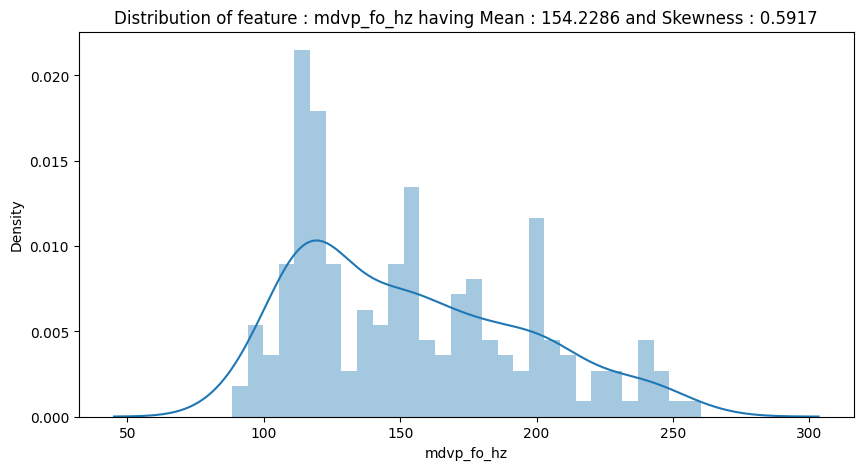

In [14]:
feature = 'mdvp_fo_hz'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),4))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

# ⚖️ Compare Feature Distribution: Healthy vs Parkinson’s

<div style="background-color:#F2FBFF; padding:20px; border-radius:1.3em; font-family:verdana; font-size:20px; line-height:1.7em; border-left:8px solid #1ABC9C;"> <p> Comparing the distribution of features between <strong>healthy individuals</strong> and <strong>Parkinson’s patients</strong> helps reveal critical differences in vocal and physiological characteristics. Such insights guide effective feature selection and model interpretation. </p> <ul> <li>Visualize feature distributions for both classes using <code>histograms</code> or <code>boxplots</code>.</li> <li>Identify which features show <strong>clear separation</strong> between healthy and affected groups.</li> <li>Analyze voice-related parameters like <strong>Jitter</strong>, <strong>Shimmer</strong>, and <strong>HNR</strong> for noticeable patterns.</li> <li>Assess statistical differences to support the <strong>predictive power</strong> of each variable.</li> <li>Use these observations to refine the <strong>feature engineering</strong> process.</li> </ul> <p> This comparative visualization step enhances understanding of how Parkinson’s affects specific speech attributes, forming a solid base for model training and interpretation. </p> </div>

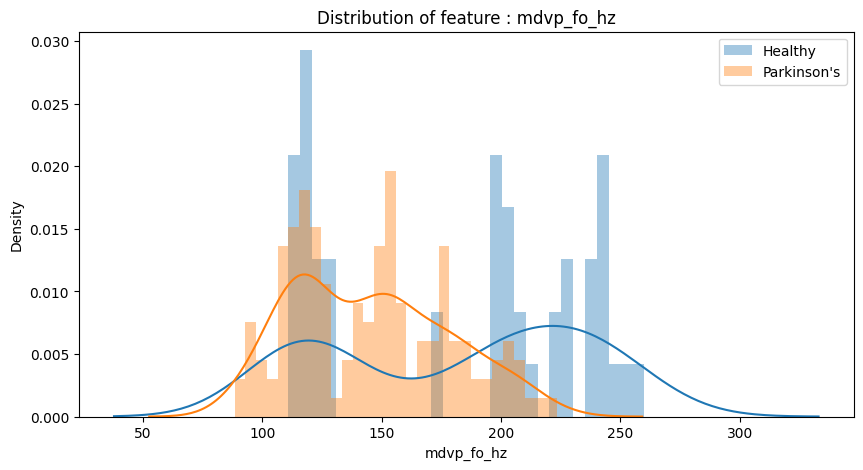

In [15]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status                         0           1
mdvp_fo_hz                                  
mdvp_fo_hz : 50-100     0.000000  100.000000
mdvp_fo_hz : 100-150   19.565217   80.434783
mdvp_fo_hz : 150-200   11.475410   88.524590
mdvp_fo_hz : 200-250   65.625000   34.375000
mdvp_fo_hz : 250-300  100.000000    0.000000


Text(0.5, 1.0, 'PD status with different mdvp_fo_hz group')

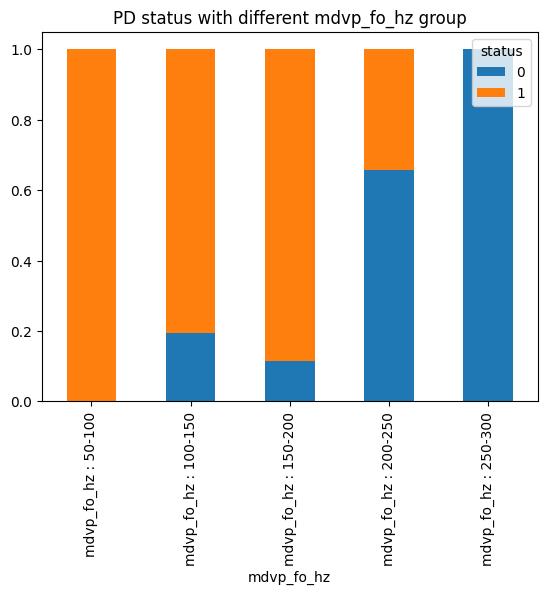

In [16]:
bins = [50,100,150,200,250,300]                                         # defining mdvp_fo_hz bins,
# defining labels of mdvp_fo_hz groups as per bins defined as above
mdvp_fo_hz_group = ['mdvp_fo_hz : 50-100', 'mdvp_fo_hz : 100-150', 'mdvp_fo_hz : 150-200', 'mdvp_fo_hz : 200-250', 'mdvp_fo_hz : 250-300']
pdData_mdvp_fo_hz_bin = pd.cut(pdData.mdvp_fo_hz,bins,labels=mdvp_fo_hz_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_fo_hz_group_col variable
mdvp_fo_hz_group_col = pd.crosstab(pdData_mdvp_fo_hz_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_fo_hz_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_fo_hz_group_col.div(mdvp_fo_hz_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_fo_hz group")                     # setting title of the figure

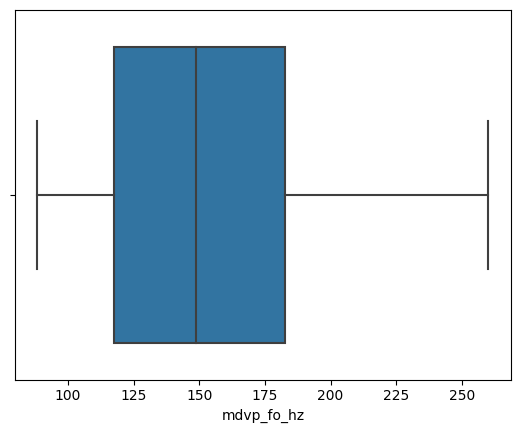

In [17]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

# 📊 Compare Feature Distribution by Parkinson’s Status
<div style="background-color:#F9F6FF; padding:20px; border-radius:1.3em; font-family:verdana; font-size:20px; line-height:1.7em; border-left:8px solid #8E44AD;"> <p> Understanding how each feature varies across <strong>Parkinson’s status categories</strong> provides critical insight into which attributes hold strong discriminative power for classification. This comparison forms a foundation for feature selection and model accuracy improvement. </p> <ul> <li>Group the dataset based on the <code>status</code> variable — <strong>0 for Healthy</strong> and <strong>1 for Parkinson’s</strong>.</li> <li>Use <code>violin plots</code>, <code>boxplots</code>, or <code>density plots</code> to visualize variations across both groups.</li> <li>Identify which features show <strong>significant shifts or skew</strong> between categories.</li> <li>Assess correlation trends that indicate strong predictive relationships.</li> <li>Use these visual insights to fine-tune <strong>feature importance ranking</strong> before model training.</li> </ul> <p> This step enhances interpretability and ensures that the machine learning models focus on the most impactful and biologically relevant features for Parkinson’s detection. </p> </div>

<Axes: xlabel='status', ylabel='mdvp_fo_hz'>

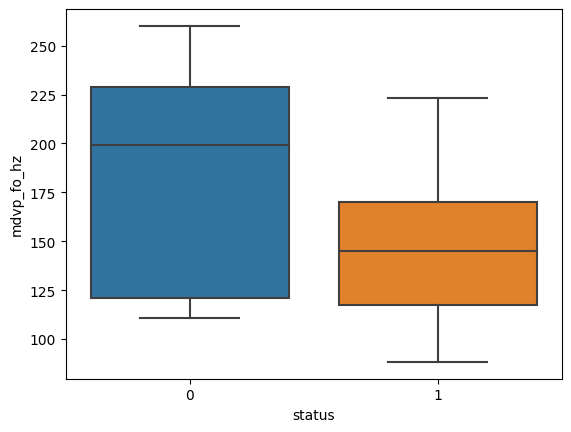

In [18]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

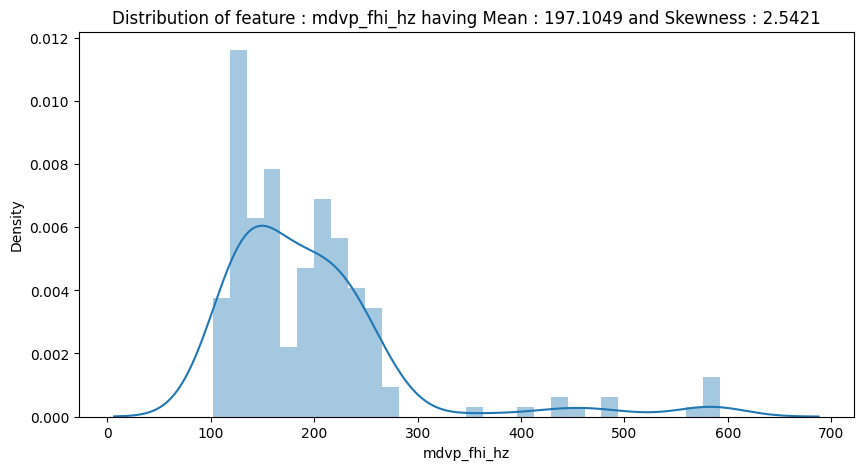

In [19]:
feature = 'mdvp_fhi_hz'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),4))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

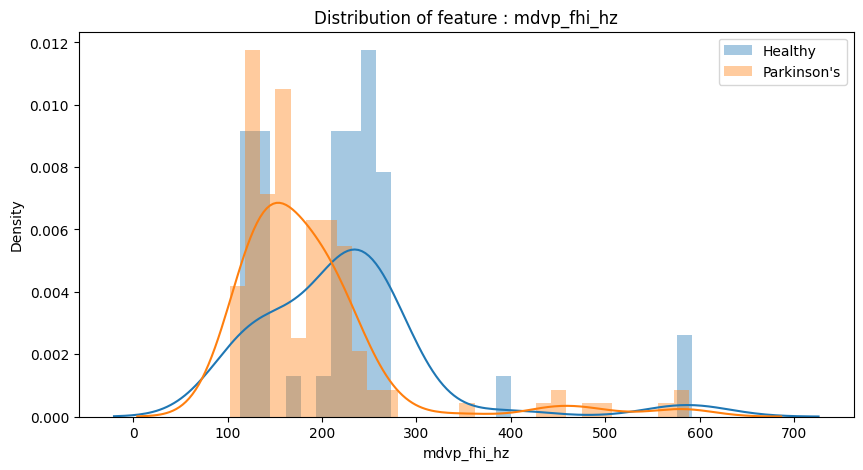

In [20]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status                         0           1
mdvp_fhi_hz                                 
mdvp_fhi_hz : 100-200  12.931034   87.068966
mdvp_fhi_hz : 200-300  44.776119   55.223881
mdvp_fhi_hz : 300-400  50.000000   50.000000
mdvp_fhi_hz : 400-500   0.000000  100.000000
mdvp_fhi_hz : 500-600  40.000000   60.000000


Text(0.5, 1.0, 'PD status with different mdvp_fhi_hz group')

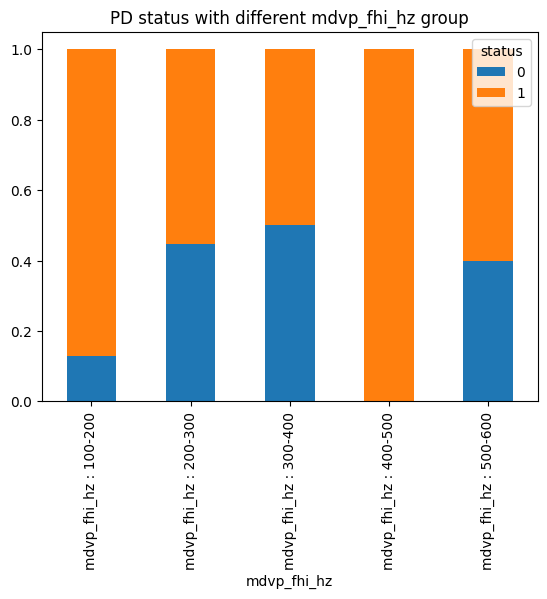

In [21]:
bins = [100,200,300,400,500,600]                                         # defining mdvp_fhi_hz bins,
# defining labels of mdvp_fhi_hz groups as per bins defined as above
mdvp_fhi_hz_group = ['mdvp_fhi_hz : 100-200', 'mdvp_fhi_hz : 200-300', 'mdvp_fhi_hz : 300-400', 'mdvp_fhi_hz : 400-500',
                     'mdvp_fhi_hz : 500-600']
pdData_mdvp_fhi_hz_bin = pd.cut(pdData[feature],bins,labels=mdvp_fhi_hz_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_fhi_hz_group_col variable
mdvp_fhi_hz_group_col = pd.crosstab(pdData_mdvp_fhi_hz_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_fhi_hz_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_fhi_hz_group_col.div(mdvp_fhi_hz_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_fhi_hz group")                     # setting title of the figure

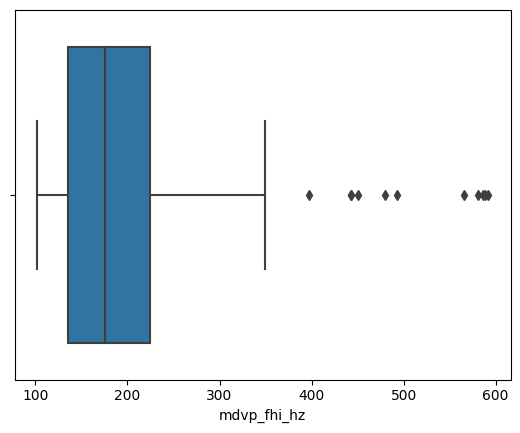

In [22]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

# 📈 Detect Outliers in Feature Using IQR

<div style="background-color:#F4FFFA; padding:20px; border-radius:1.3em; font-family:verdana; font-size:20px; line-height:1.7em; border-left:8px solid #27AE60;"> <p> Detecting and handling <strong>outliers</strong> is an essential step in ensuring data quality and maintaining model stability. The <strong>Interquartile Range (IQR)</strong> method helps identify extreme values that may distort analysis or model performance. </p> <ul> <li>Compute the <code>Q1</code> (25th percentile) and <code>Q3</code> (75th percentile) for each numerical feature.</li> <li>Determine the <strong>IQR</strong> using <code>IQR = Q3 - Q1</code>.</li> <li>Define the outlier thresholds as: <br><code>Lower Bound = Q1 - 1.5 * IQR</code> <br><code>Upper Bound = Q3 + 1.5 * IQR</code></li> <li>Flag data points lying outside these bounds as potential outliers.</li> <li>Visualize distributions using <strong>boxplots</strong> to confirm the presence of outliers.</li> <li>Decide whether to <strong>remove</strong> or <strong>transform</strong> them depending on their impact.</li> </ul> <p> This step improves data reliability and ensures that the learning algorithms focus on genuine patterns rather than noisy extremes. </p> </div>

In [23]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR

outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),3),round(np.median(pdData[feature]),3),round(IQR,3))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature mdvp_fhi_hz : Mean = 197.105, Median = 175.829 and Inter-Quartile-Range (IQR) = 89.343

*****************************************************************************************************************************
There are 11 outliers (5.641 % of the data points) in mdvp_fhi_hz feature and the values are [588.518, 586.567, 492.892, 442.557, 450.247, 442.824, 479.697, 565.74, 592.03, 581.289, 396.961]
*****************************************************************************************************************************


<Axes: xlabel='status', ylabel='mdvp_fhi_hz'>

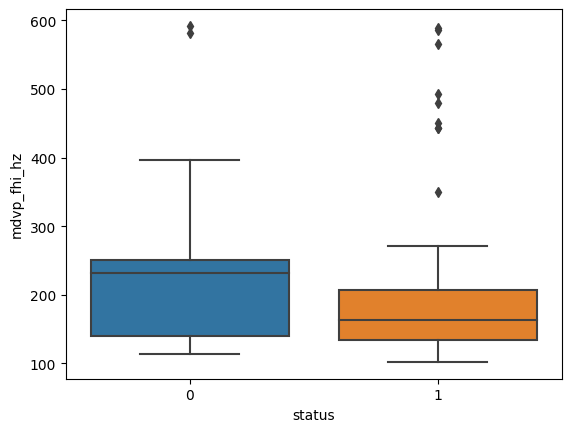

In [24]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

# Visualize mdvp_flo_hz Distribution with Skewness

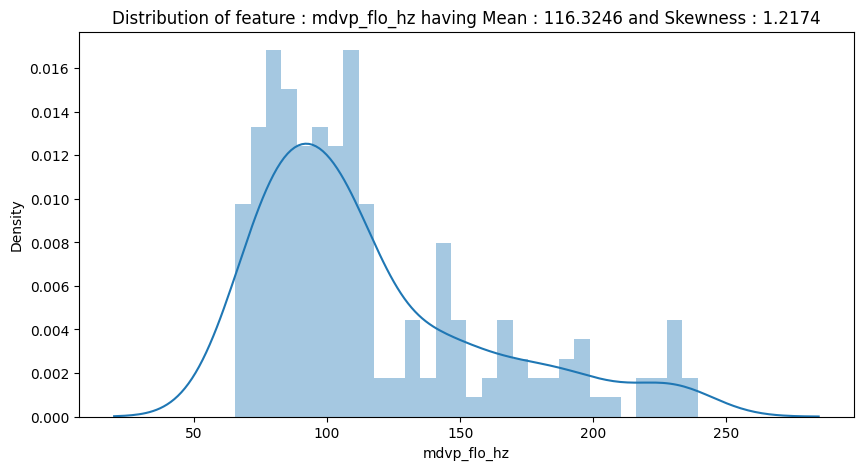

In [25]:
feature = 'mdvp_flo_hz'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),4))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

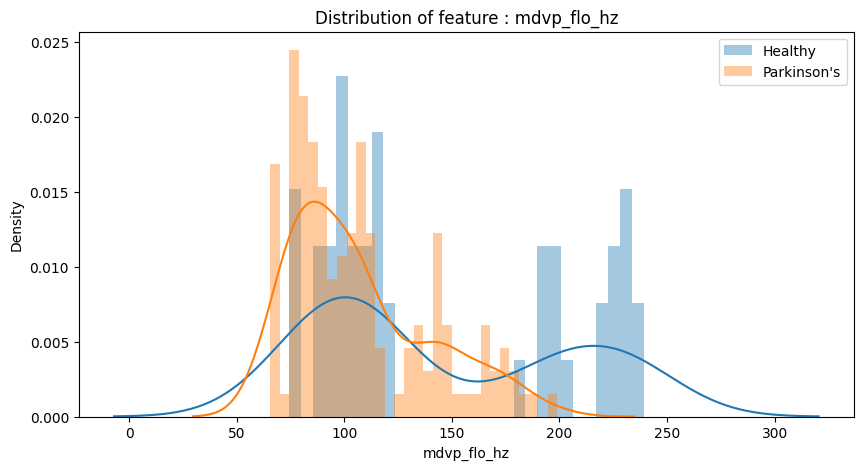

In [26]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status                          0          1
mdvp_flo_hz                                 
mdvp_flo_hz : 50-100    16.853933  83.146067
mdvp_flo_hz : 100-150   20.000000  80.000000
mdvp_flo_hz : 150-200   29.166667  70.833333
mdvp_flo_hz : 200-250  100.000000   0.000000


Text(0.5, 1.0, 'PD status with different mdvp_flo_hz group')

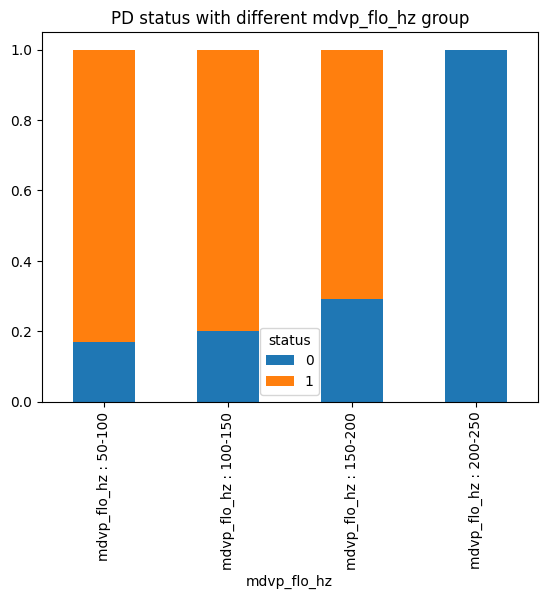

In [27]:
bins = [50,100,150,200,250]                                         # defining mdvp_flo_hz bins,
# defining labels of mdvp_flo_hz groups as per bins defined as above
mdvp_flo_hz_group = ['mdvp_flo_hz : 50-100', 'mdvp_flo_hz : 100-150', 'mdvp_flo_hz : 150-200', 'mdvp_flo_hz : 200-250']
pdData_mdvp_flo_hz_bin = pd.cut(pdData[feature],bins,labels=mdvp_flo_hz_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_flo_hz_group_col variable
mdvp_flo_hz_group_col = pd.crosstab(pdData_mdvp_flo_hz_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_flo_hz_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_flo_hz_group_col.div(mdvp_flo_hz_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_flo_hz group")                     # setting title of the figure

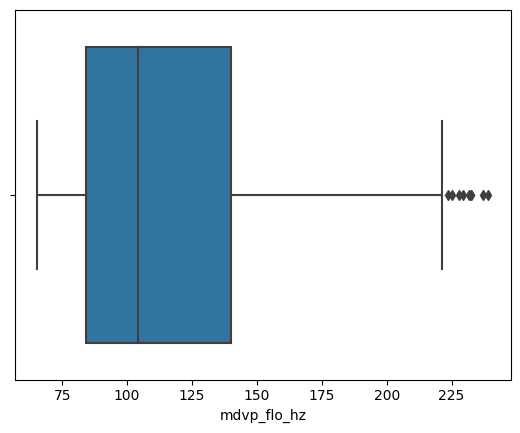

In [28]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

# In the 'mdvp_flo_hz' attribute some outliers are present, let's check for the same :

# Detect Outliers in mdvp_flo_hz Using IQR

In [29]:
Q1 = pdData[feature].quantile(0.25)        #
Q3 = pdData[feature].quantile(0.75)        #
IQR = Q3 - Q1


outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),3),round(np.median(pdData[feature]),3),round(IQR,3))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature mdvp_flo_hz : Mean = 116.325, Median = 104.315 and Inter-Quartile-Range (IQR) = 55.728

*****************************************************************************************************************************
There are 9 outliers (4.615 % of the data points) in mdvp_flo_hz feature and the values are [225.227, 232.483, 232.435, 227.911, 231.848, 223.634, 229.256, 237.303, 239.17]
*****************************************************************************************************************************


<Axes: xlabel='status', ylabel='mdvp_flo_hz'>

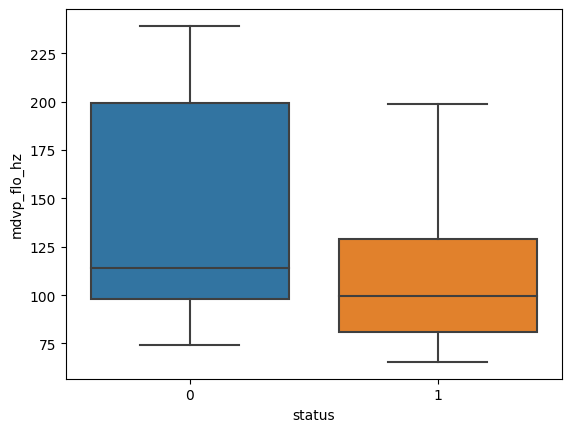

In [30]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

**Visualize mdvp_jitter_in_percent Distribution**

🔍 Examine the distribution of the mdvp_jitter_in_percent feature using Seaborn’s distplot.

🧮 Display mean and skewness to understand central tendency and asymmetry.

👀 Identify outliers or skewed data for preprocessing before modeling.

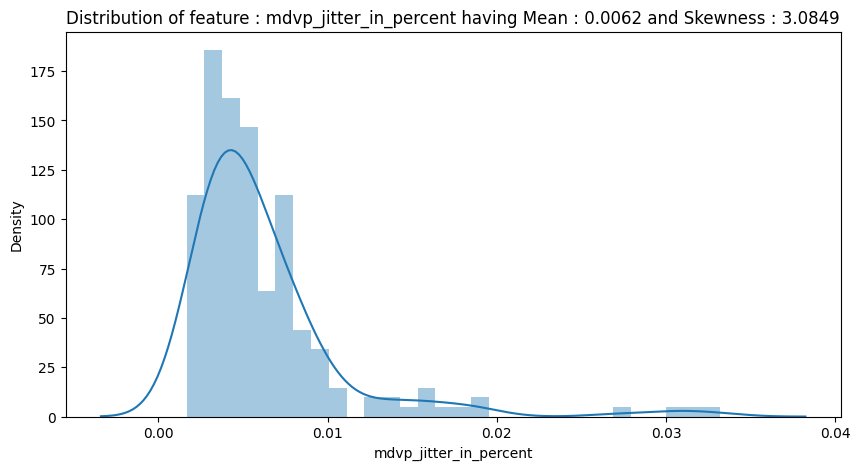

In [31]:
feature = 'mdvp_jitter_in_percent'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),4))        # variable
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable
plt.figure(figsize=(10,5))                                         # setting
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

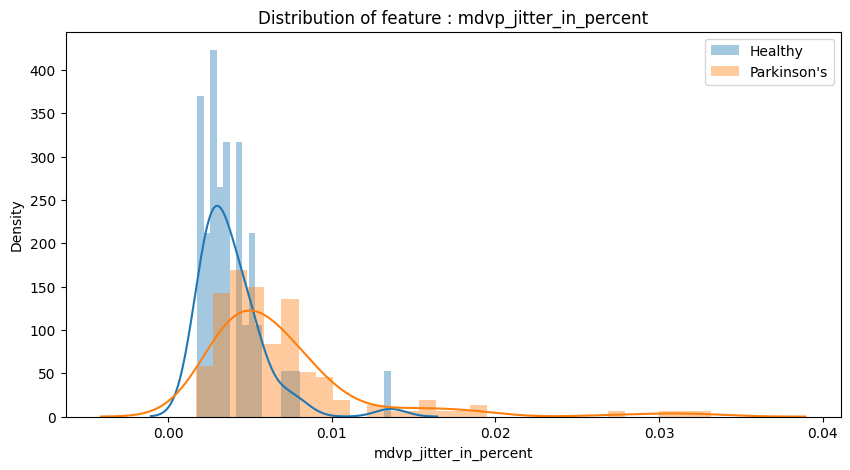

In [32]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status                          0           1
mdvp_jitter_in_percent                       
0.001-0.005             38.235294   61.764706
0.005-0.010             10.810811   89.189189
0.010-0.015             12.500000   87.500000
0.015-0.020              0.000000  100.000000
0.025-0.030              0.000000  100.000000
0.030-0.035              0.000000  100.000000


Text(0.5, 1.0, 'PD status with different mdvp_jitter_in_percent group')

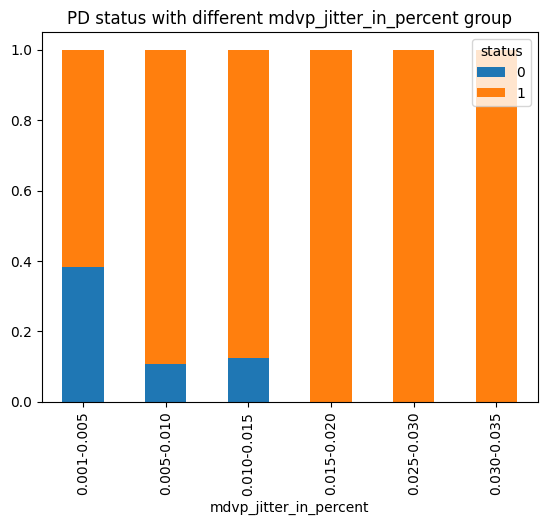

In [33]:
bins = [0.001,0.005,0.010,0.015,0.020,0.025,0.030,0.035]                                         # defining mdvp_jitter_in_percent bins,
# defining labels of mdvp_jitter_in_percent groups as per bins defined as above
mdvp_jitter_in_percent_group = ['0.001-0.005', '0.005-0.010', '0.010-0.015', '0.015-0.020', '0.020-0.025', '0.025-0.030',
                                '0.030-0.035']
pdData_mdvp_jitter_in_percent_bin = pd.cut(pdData[feature],bins,labels=mdvp_jitter_in_percent_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_jitter_in_percent_group_col variable
mdvp_jitter_in_percent_group_col = pd.crosstab(pdData_mdvp_jitter_in_percent_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_jitter_in_percent_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_jitter_in_percent_group_col.div(mdvp_jitter_in_percent_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_jitter_in_percent group")                     # setting title of the figure

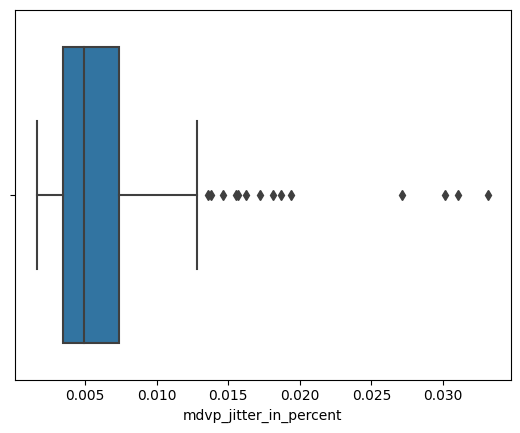

In [34]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

In [35]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),3),round(np.median(pdData[feature]),3),round(IQR,3))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature mdvp_jitter_in_percent : Mean = 0.006, Median = 0.005 and Inter-Quartile-Range (IQR) = 0.004

*****************************************************************************************************************************
There are 14 outliers (7.179 % of the data points) in mdvp_jitter_in_percent feature and the values are [0.01378, 0.01936, 0.03316, 0.01551, 0.03011, 0.01568, 0.01466, 0.01719, 0.01627, 0.01872, 0.03107, 0.02714, 0.01813, 0.0136]
*****************************************************************************************************************************


<Axes: xlabel='status', ylabel='mdvp_jitter_in_percent'>

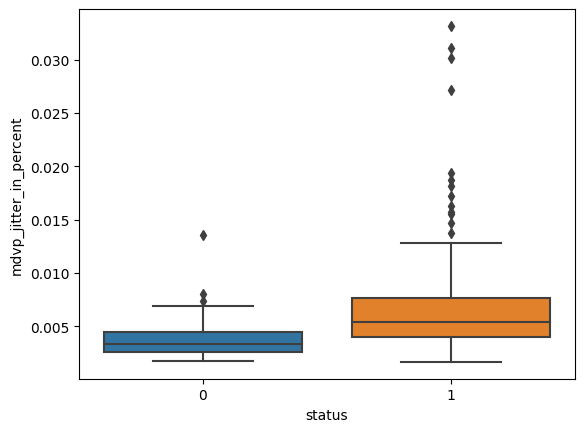

In [36]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

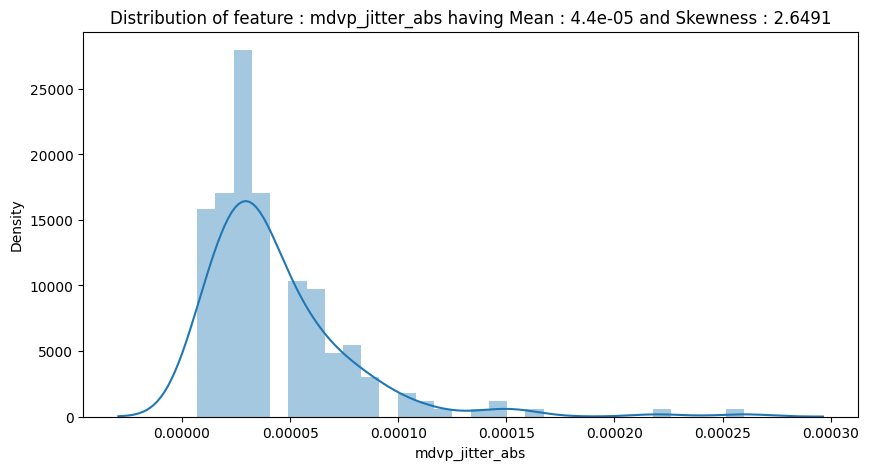

In [37]:
feature = 'mdvp_jitter_abs'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

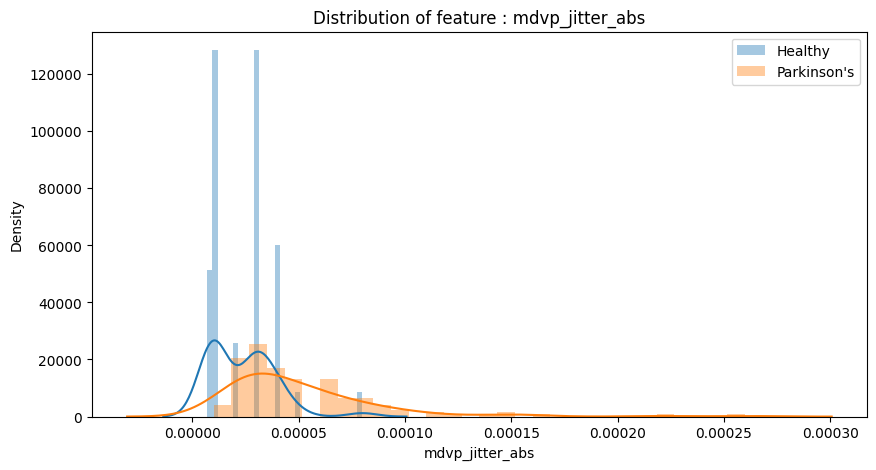

In [38]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

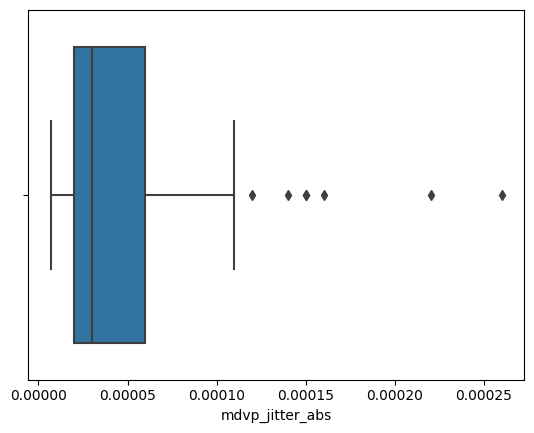

In [39]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

**Outlier Detection Using IQR for a Feature**

**📊 Compute mean, median, and interquartile range (IQR) for the selected feature.

🚨 Identify mild and extreme outliers using the 1.5 × IQR method.

👀 Display number, percentage, and values of outliers to understand feature variability and data quality.**

In [40]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature mdvp_jitter_abs : Mean = 4.4e-05, Median = 3e-05 and Inter-Quartile-Range (IQR) = 4e-05

*****************************************************************************************************************************
There are 7 outliers (3.59 % of the data points) in mdvp_jitter_abs feature and the values are [0.00015, 0.00026, 0.00012, 0.00022, 0.00016, 0.00014, 0.00015]
*****************************************************************************************************************************


<Axes: xlabel='status', ylabel='mdvp_jitter_abs'>

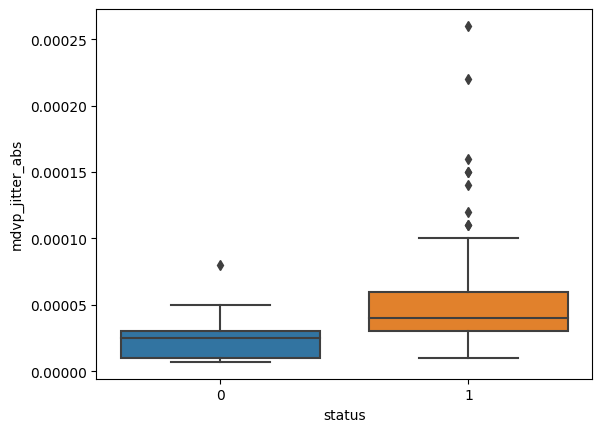

In [41]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

**Visualize mdvp_rap Distribution**

🔍 Examine the distribution of the mdvp_rap feature using Seaborn’s distplot.

🧮 Display mean and skewness to understand central tendency and asymmetry of the data.

👀 Identify outliers or skewed patterns that may influence modeling or analysis.

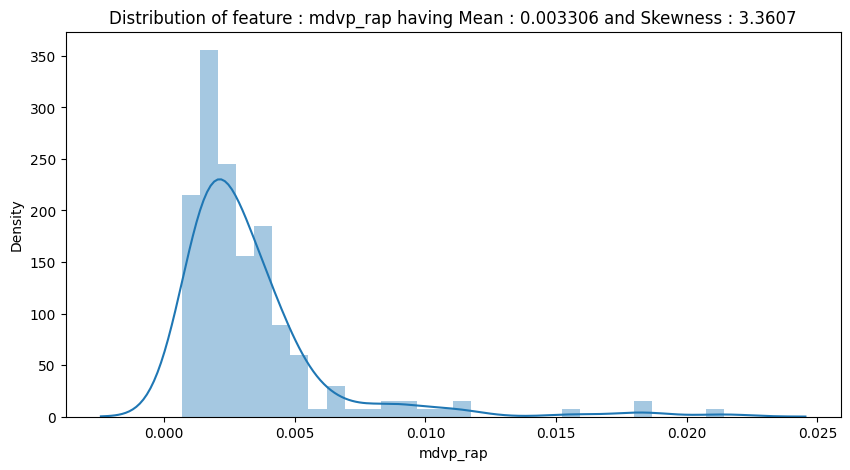

In [42]:
feature = 'mdvp_rap'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

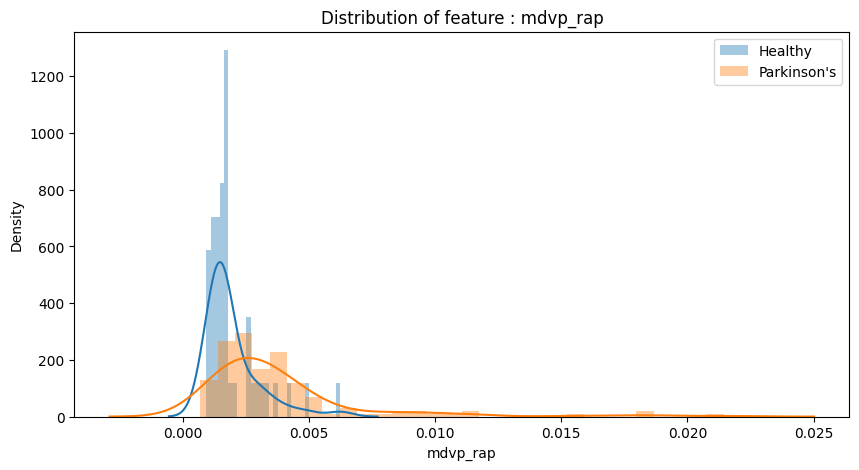

In [43]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status               0           1
mdvp_rap                          
0.000-0.005  27.647059   72.352941
0.005-.010    5.555556   94.444444
0.010-0.015   0.000000  100.000000
0.015-0.020   0.000000  100.000000
0.020-0.025   0.000000  100.000000


Text(0.5, 1.0, 'PD status with different mdvp_rap group')

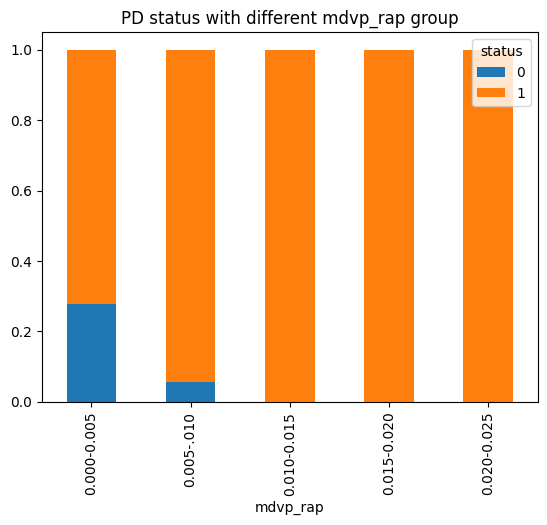

In [44]:
bins = [0.000,0.005,0.010,0.015,0.020,0.025]                                         # defining mdvp_rap bins,
# defining labels of mdvp_rap groups as per bins defined as above
mdvp_rap_group = ['0.000-0.005', '0.005-.010', '0.010-0.015', '0.015-0.020', '0.020-0.025']
pdData_mdvp_rap_bin = pd.cut(pdData[feature],bins,labels=mdvp_rap_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_rap_group_col variable
mdvp_rap_group_col = pd.crosstab(pdData_mdvp_rap_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_rap_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_rap_group_col.div(mdvp_rap_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_rap group")                     # setting title of the figure

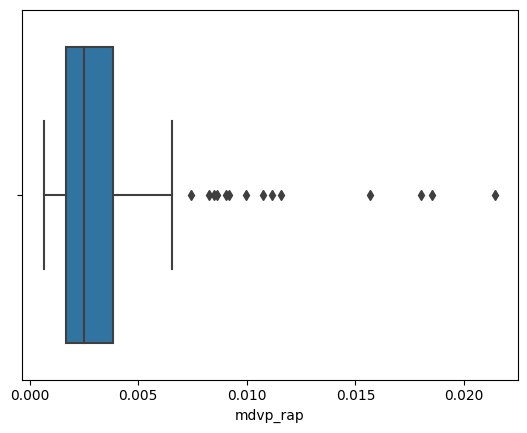

In [45]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

# 📊 Visualize mdvp_rap Distribution

<div style="background-color:#FFF7FB; padding:20px; border-radius:1.3em; font-family:verdana; font-size:20px; line-height:1.7em; border-left:8px solid #E91E63;"> <p> The <strong><code>MDVP:Rap</code></strong> feature measures the relative amplitude perturbation in a voice signal — a key indicator of <strong>vocal tremor and irregularities</strong> commonly found in Parkinson’s Disease. Visualizing its distribution helps assess the variability and detect possible deviations between healthy and affected individuals. </p> <ul> <li>Plot the distribution using <code>seaborn.histplot()</code> or <code>sns.kdeplot()</code> to observe spread and skewness.</li> <li>Compare distributions across <strong>healthy (0)</strong> and <strong>Parkinson’s (1)</strong> groups using color-coded visualizations.</li> <li>Identify whether <strong>Parkinson’s patients</strong> show significantly higher amplitude variation.</li> <li>Use visual findings to validate the feature’s <strong>predictive relevance</strong> in model training.</li> </ul> <p> This visualization step aids in understanding how <strong>MDVP:Rap</strong> differs between groups, revealing early markers of voice-based neuromuscular irregularities. </p> </div>

In [46]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature mdvp_rap : Mean = 0.003306, Median = 0.0025 and Inter-Quartile-Range (IQR) = 0.002175

*****************************************************************************************************************************
There are 14 outliers (7.179 % of the data points) in mdvp_rap feature and the values are [0.00743, 0.00826, 0.01159, 0.02144, 0.00905, 0.01854, 0.00863, 0.00849, 0.00996, 0.00919, 0.01075, 0.018, 0.01568, 0.01117]
*****************************************************************************************************************************


<Axes: xlabel='status', ylabel='mdvp_rap'>

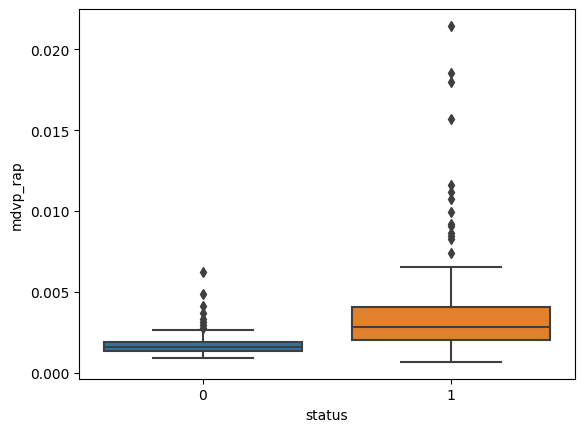

In [47]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

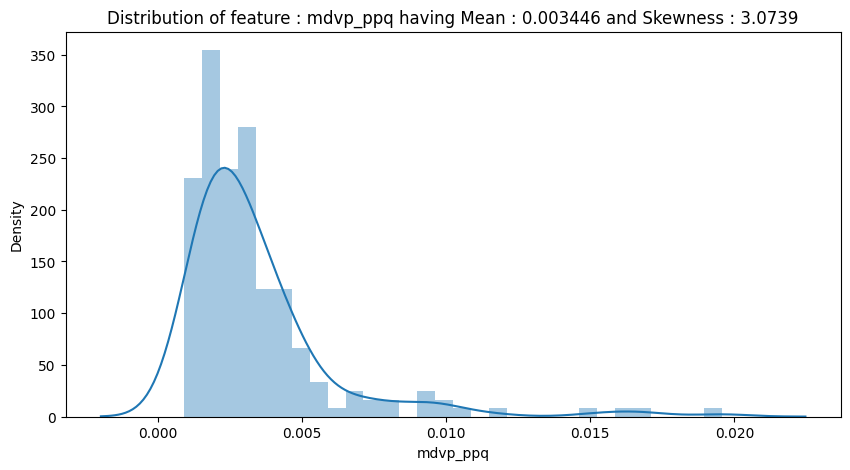

In [48]:
feature = 'mdvp_ppq'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

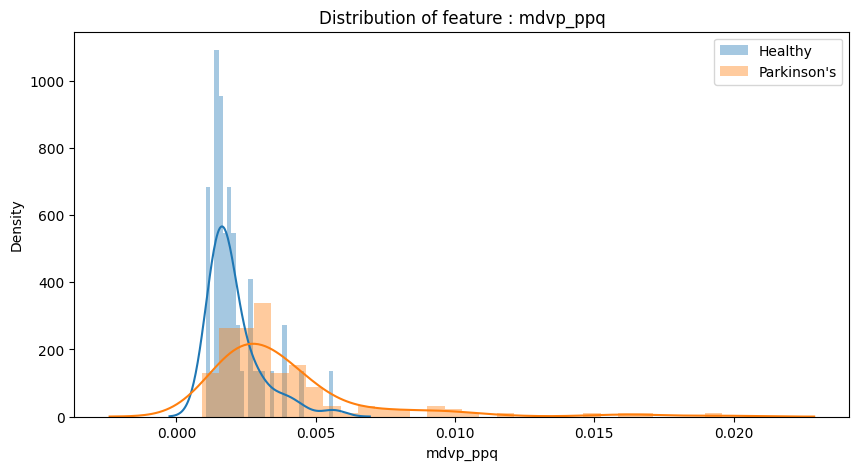

In [49]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status               0           1
mdvp_ppq                          
0.000-0.005  27.647059   72.352941
0.005-.010    5.263158   94.736842
0.010-0.015   0.000000  100.000000
0.015-0.020   0.000000  100.000000


Text(0.5, 1.0, 'PD status with different mdvp_ppq group')

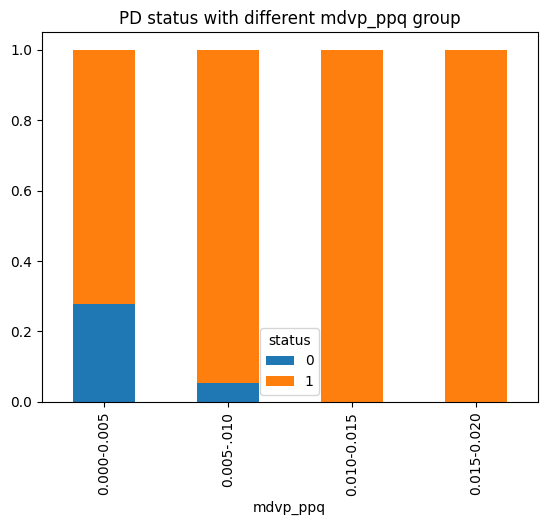

In [50]:
bins = [0.000,0.005,0.010,0.015,0.020]                                         # defining mdvp_ppq bins,
# defining labels of mdvp_ppq groups as per bins defined as above
mdvp_ppq_group = ['0.000-0.005', '0.005-.010', '0.010-0.015', '0.015-0.020']
pdData_mdvp_ppq_bin = pd.cut(pdData[feature],bins,labels=mdvp_ppq_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_ppq_group_col variable
mdvp_ppq_group_col = pd.crosstab(pdData_mdvp_ppq_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_ppq_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_ppq_group_col.div(mdvp_ppq_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_ppq group")                     # setting title of the figure

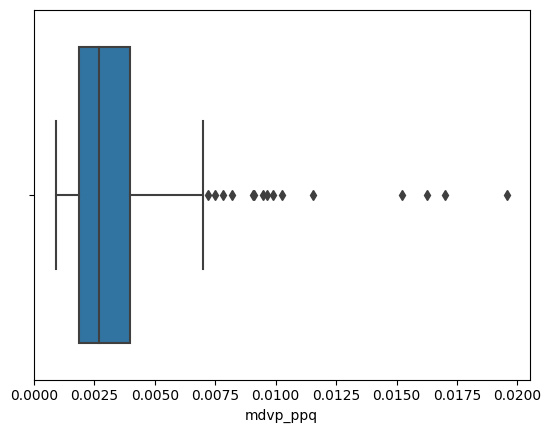

In [51]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

In [52]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature mdvp_ppq : Mean = 0.003446, Median = 0.00269 and Inter-Quartile-Range (IQR) = 0.002095

*****************************************************************************************************************************
There are 15 outliers (7.692 % of the data points) in mdvp_ppq feature and the values are [0.00781, 0.00908, 0.0075, 0.0099, 0.01522, 0.00909, 0.01628, 0.00946, 0.00819, 0.01027, 0.00963, 0.01154, 0.01958, 0.01699, 0.00718]
*****************************************************************************************************************************


<Axes: xlabel='status', ylabel='mdvp_ppq'>

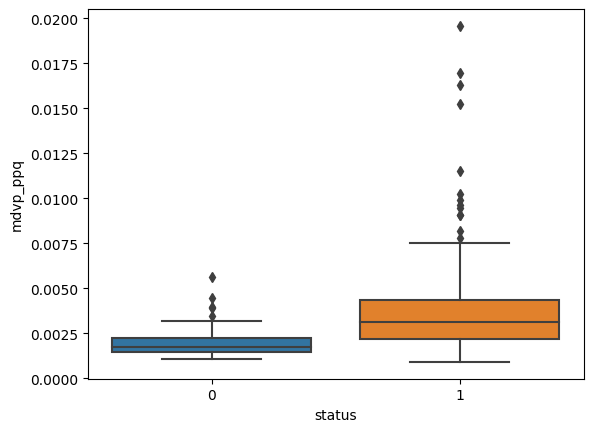

In [53]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

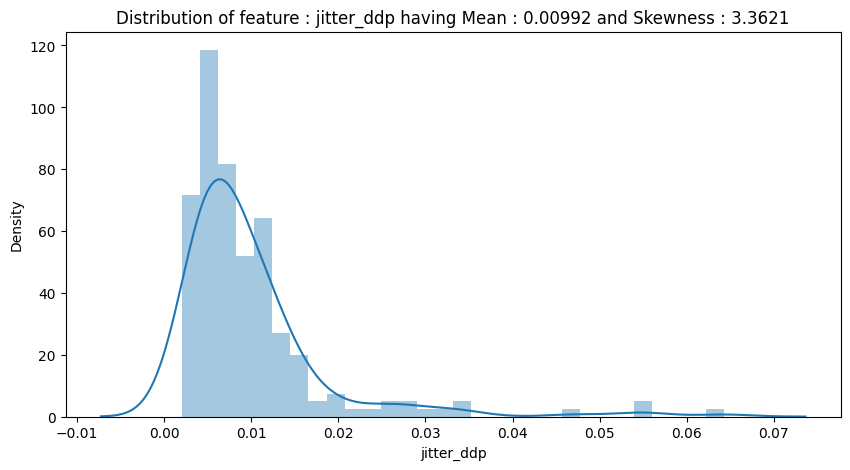

In [54]:
feature = 'jitter_ddp'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

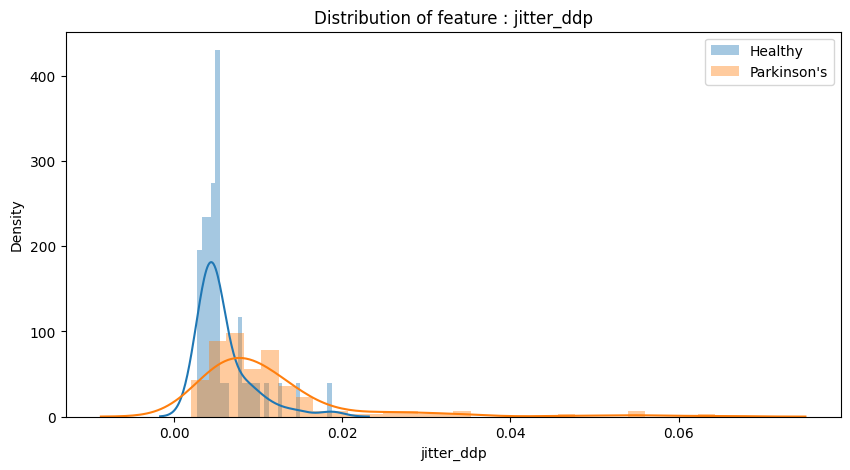

In [55]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status              0           1
jitter_ddp                       
0.00-0.02   26.519337   73.480663
0.02-0.04    0.000000  100.000000
0.04-0.06    0.000000  100.000000
0.06-0.08    0.000000  100.000000


Text(0.5, 1.0, 'PD status with different jitter_ddp group')

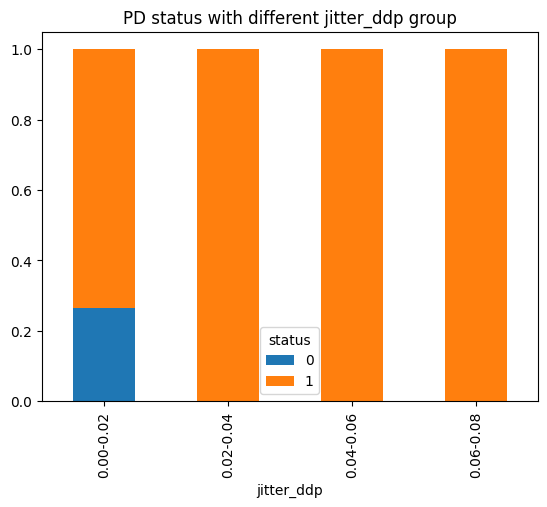

In [56]:
bins = [0.00,0.02,0.04,0.06,0.80]                                         # defining jitter_ddp bins,
# defining labels of jitter_ddp groups as per bins defined as above
jitter_ddp_group = ['0.00-0.02', '0.02-0.04', '0.04-0.06', '0.06-0.08']
pdData_jitter_ddp_bin = pd.cut(pdData[feature],bins,labels=jitter_ddp_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to jitter_ddp_group_col variable
jitter_ddp_group_col = pd.crosstab(pdData_jitter_ddp_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(jitter_ddp_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
jitter_ddp_group_col.div(jitter_ddp_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different jitter_ddp group")                     # setting title of the figure

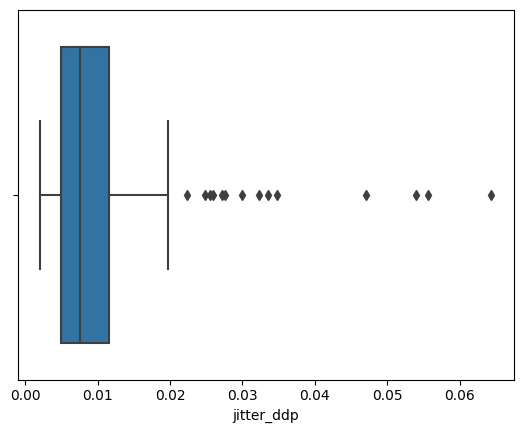

In [57]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

In [58]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature jitter_ddp : Mean = 0.00992, Median = 0.00749 and Inter-Quartile-Range (IQR) = 0.00652

*****************************************************************************************************************************
There are 14 outliers (7.179 % of the data points) in jitter_ddp feature and the values are [0.02228, 0.02478, 0.03476, 0.06433, 0.02716, 0.05563, 0.02589, 0.02546, 0.02987, 0.02756, 0.03225, 0.05401, 0.04705, 0.03351]
*****************************************************************************************************************************


<Axes: xlabel='status', ylabel='jitter_ddp'>

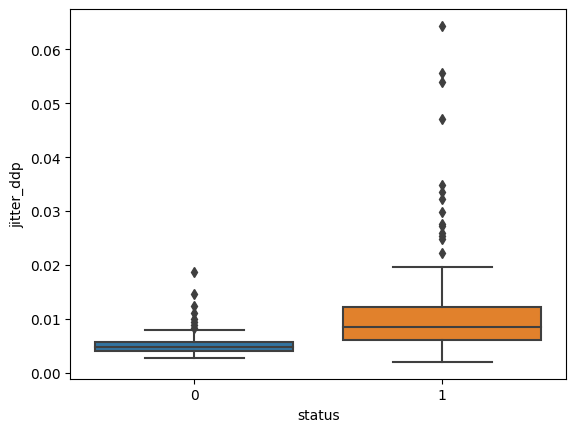

In [59]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

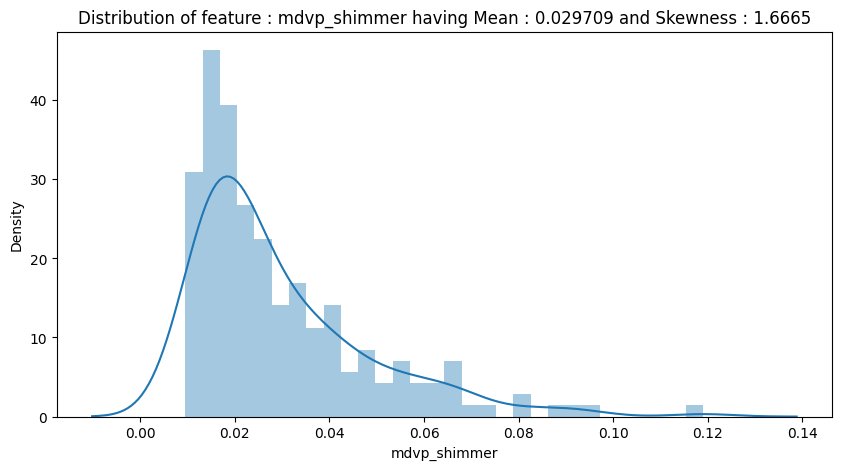

In [60]:
feature = 'mdvp_shimmer'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

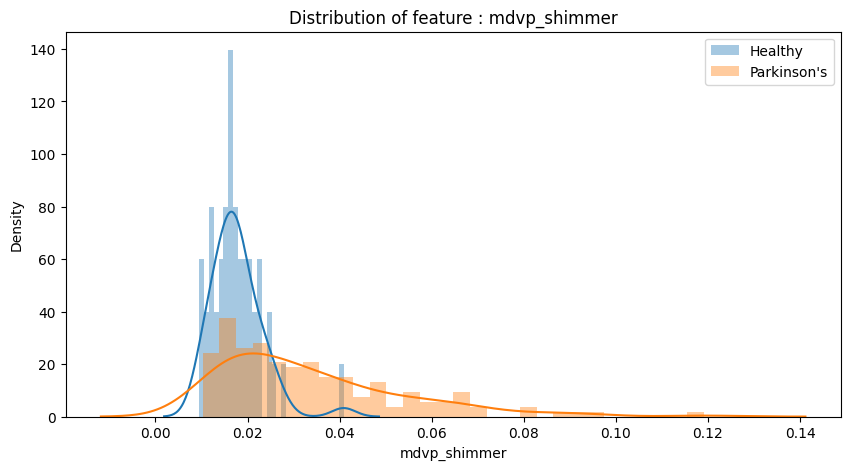

In [61]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

# 📉 Detect Outliers in mdvp_rap Using IQR
<div style="background-color:#F3FFFA; padding:20px; border-radius:1.3em; font-family:verdana; font-size:20px; line-height:1.7em; border-left:8px solid #2ECC71;"> <p> Outlier detection for the <strong><code>MDVP:Rap</code></strong> feature is crucial to ensure accurate modeling and prevent distortion in statistical analysis. Using the <strong>Interquartile Range (IQR)</strong> method helps isolate extreme values that may represent abnormal recordings or noise. </p> <ul> <li>Calculate the <code>Q1</code> (25th percentile) and <code>Q3</code> (75th percentile) for the <strong>MDVP:Rap</strong> feature.</li> <li>Compute the <strong>IQR</strong> as <code>IQR = Q3 - Q1</code>.</li> <li>Determine outlier boundaries: <br><code>Lower Bound = Q1 - 1.5 * IQR</code> <br><code>Upper Bound = Q3 + 1.5 * IQR</code></li> <li>Identify all data points lying outside these thresholds as potential outliers.</li> <li>Visualize the results using a <strong>boxplot</strong> to confirm the presence and extent of outliers.</li> <li>Decide whether to <strong>remove</strong>, <strong>cap</strong>, or <strong>retain</strong> the outliers based on their clinical or analytical significance.</li> </ul> <p> This process ensures a <strong>cleaner and more balanced dataset</strong>, allowing the model to learn from genuine patterns rather than being influenced by erratic data points. </p> </div>

status                0           1
mdvp_shimmer                       
0.00-0.02     44.871795   55.128205
0.02-0.04     16.438356   83.561644
0.04-0.06      3.703704   96.296296
0.06-0.08      0.000000  100.000000
0.08-0.10      0.000000  100.000000
0.10-0.12      0.000000  100.000000


Text(0.5, 1.0, 'PD status with different mdvp_shimmer group')

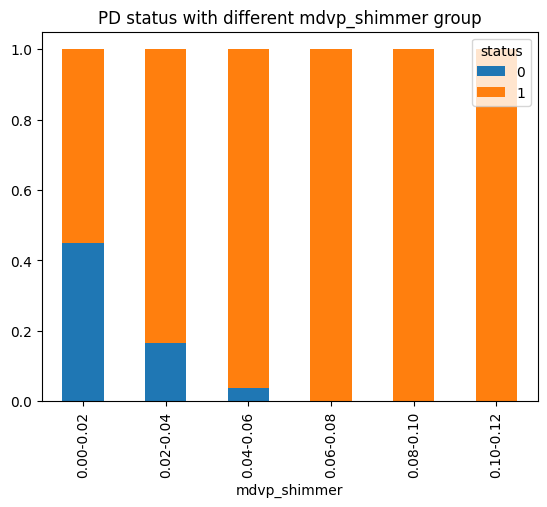

In [62]:
bins = [0.00,0.02,0.04,0.06,0.08,0.10,0.12]                                         # defining mdvp_shimmer bins,
# defining labels of mdvp_shimmer groups as per bins defined as above
mdvp_shimmer_group = ['0.00-0.02', '0.02-0.04', '0.04-0.06', '0.06-0.08', '0.08-0.10', '0.10-0.12']
pdData_mdvp_shimmer_bin = pd.cut(pdData[feature],bins,labels=mdvp_shimmer_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_shimmer_group_col variable
mdvp_shimmer_group_col = pd.crosstab(pdData_mdvp_shimmer_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_shimmer_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_shimmer_group_col.div(mdvp_shimmer_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_shimmer group")                     # setting title of the figure

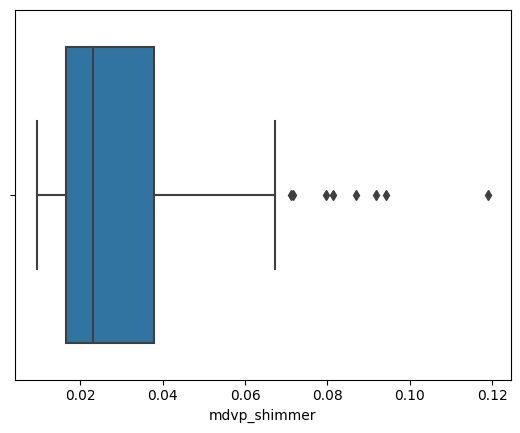

In [63]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

In [64]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature mdvp_shimmer : Mean = 0.029709, Median = 0.02297 and Inter-Quartile-Range (IQR) = 0.02138

*****************************************************************************************************************************
There are 8 outliers (4.103 % of the data points) in mdvp_shimmer feature and the values are [0.07959, 0.09178, 0.09419, 0.08143, 0.07118, 0.0717, 0.11908, 0.08684]
*****************************************************************************************************************************


<Axes: xlabel='status', ylabel='mdvp_shimmer'>

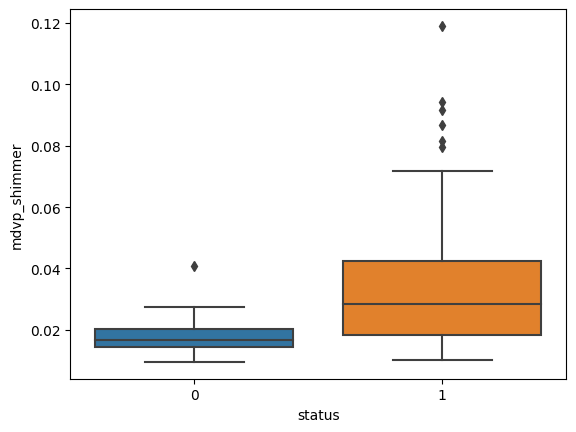

In [65]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

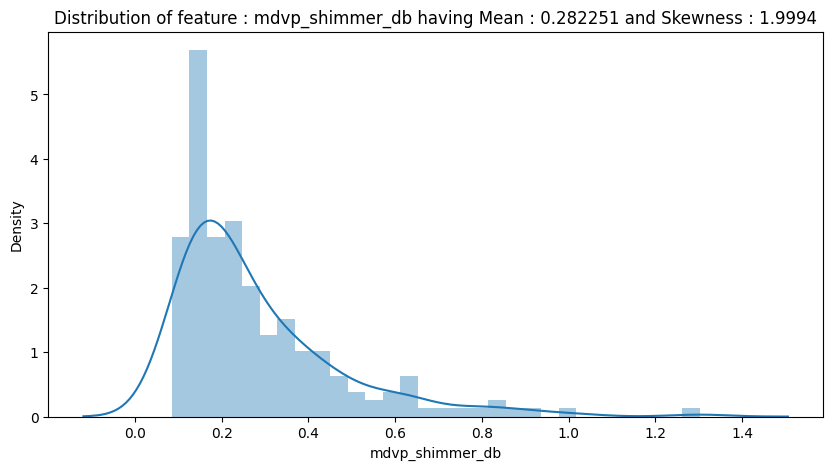

In [66]:
feature = 'mdvp_shimmer_db'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

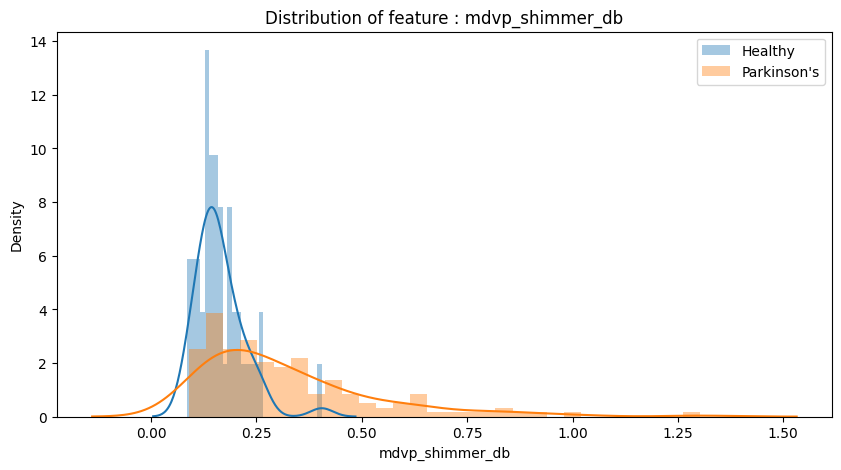

In [67]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status                   0           1
mdvp_shimmer_db                       
0.00-0.25        38.596491   61.403509
0.25-0.50         6.779661   93.220339
0.50-0.75         0.000000  100.000000
0.75-1.00         0.000000  100.000000
1.00-1.25         0.000000  100.000000
1.25-1.50         0.000000  100.000000


Text(0.5, 1.0, 'PD status with different mdvp_shimmer_db group')

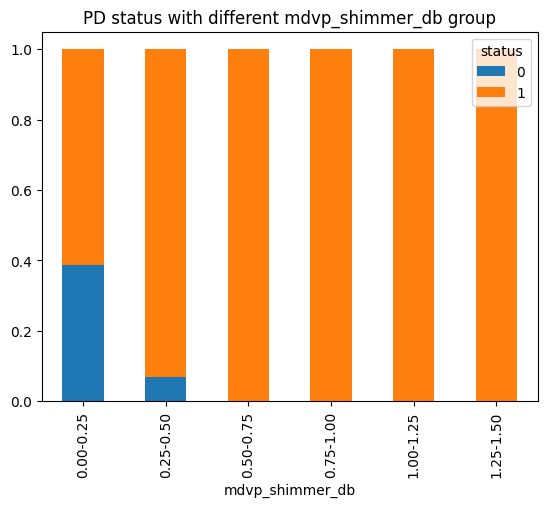

In [68]:
bins = [0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50]                                         # defining mdvp_shimmer_db bins,
# defining labels of mdvp_shimmer_db groups as per bins defined as above
mdvp_shimmer_db_group = ['0.00-0.25', '0.25-0.50', '0.50-0.75', '0.75-1.00', '1.00-1.25', '1.25-1.50']
pdData_mdvp_shimmer_db_bin = pd.cut(pdData[feature],bins,labels=mdvp_shimmer_db_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_shimmer_db_group_col variable
mdvp_shimmer_db_group_col = pd.crosstab(pdData_mdvp_shimmer_db_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_shimmer_db_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_shimmer_db_group_col.div(mdvp_shimmer_db_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_shimmer_db group")                     # setting title of the figure

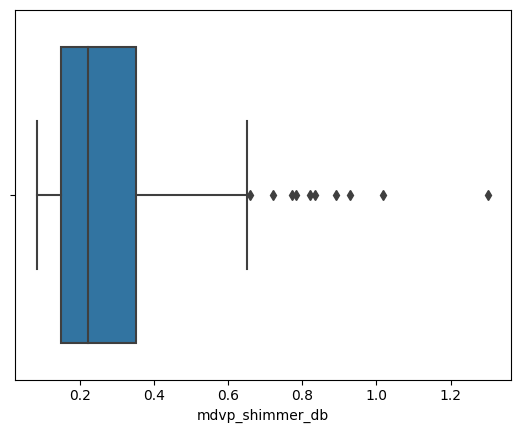

In [69]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

In [70]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature mdvp_shimmer_db : Mean = 0.282251, Median = 0.221 and Inter-Quartile-Range (IQR) = 0.2015

*****************************************************************************************************************************
There are 10 outliers (5.128 % of the data points) in mdvp_shimmer_db feature and the values are [0.772, 0.659, 0.891, 0.93, 0.821, 0.722, 0.833, 0.784, 1.302, 1.018]
*****************************************************************************************************************************


<Axes: xlabel='status', ylabel='mdvp_shimmer_db'>

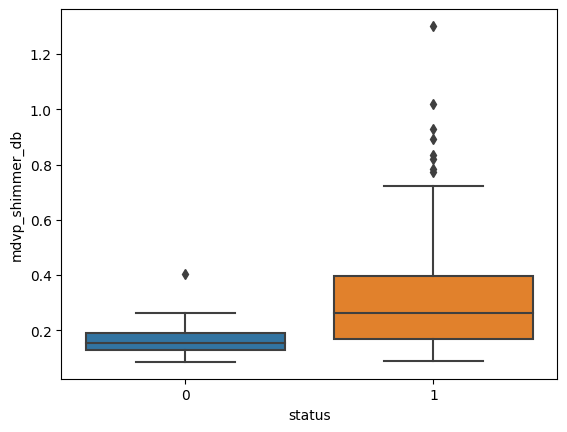

In [71]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

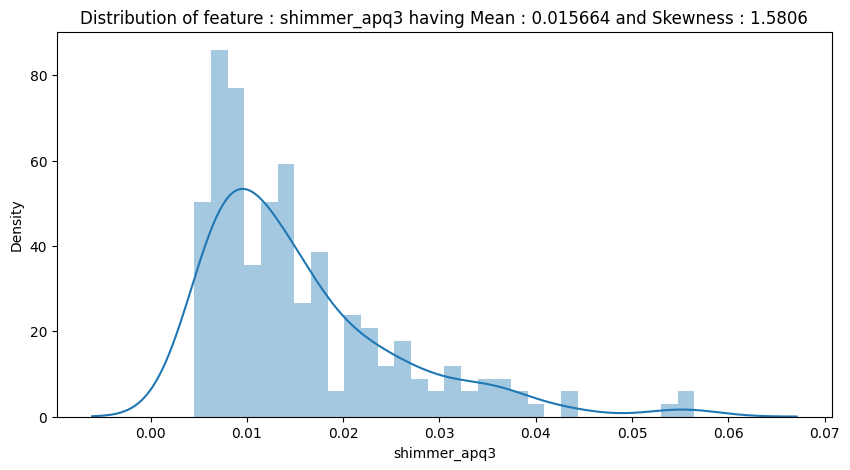

In [72]:
feature = 'shimmer_apq3'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

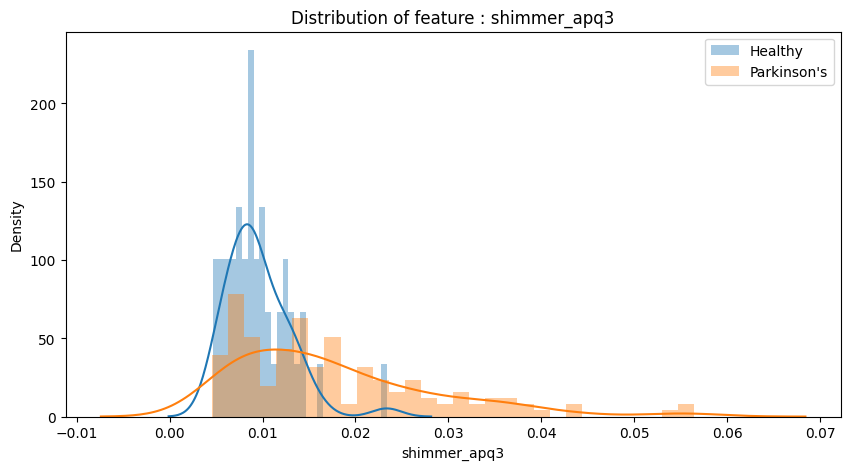

In [73]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status                0           1
shimmer_apq3                       
0.00-0.01     41.095890   58.904110
0.01-0.02     23.611111   76.388889
0.02-0.03      3.333333   96.666667
0.03-0.04      0.000000  100.000000
0.04-0.05      0.000000  100.000000
0.05-0.06      0.000000  100.000000


Text(0.5, 1.0, 'PD status with different shimmer_apq3 group')

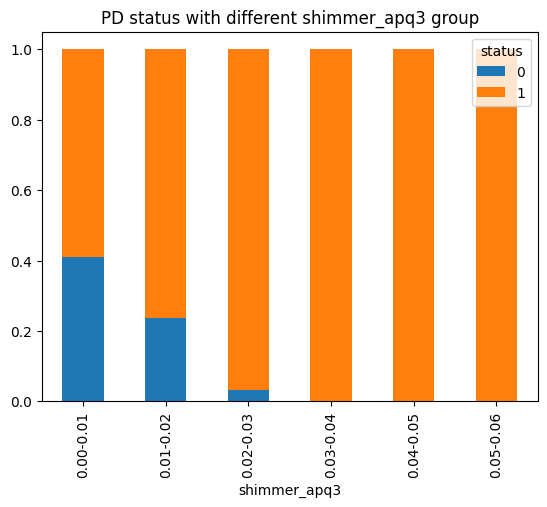

In [74]:
bins = [0.00, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06]                                         # defining shimmer_apq3 bins,
# defining labels of shimmer_apq3 groups as per bins defined as above
shimmer_apq3_group = ['0.00-0.01', '0.01-0.02', '0.02-0.03', '0.03-0.04', '0.04-0.05', '0.05-0.06']
pdData_shimmer_apq3_bin = pd.cut(pdData[feature],bins,labels=shimmer_apq3_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to shimmer_apq3_group_col variable
shimmer_apq3_group_col = pd.crosstab(pdData_shimmer_apq3_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(shimmer_apq3_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
shimmer_apq3_group_col.div(shimmer_apq3_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different shimmer_apq3 group")                     # setting title of the figure

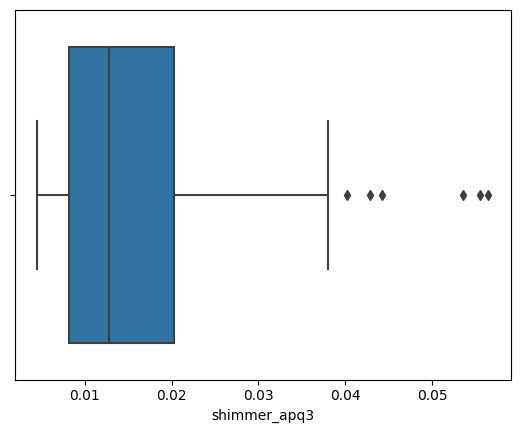

In [75]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

In [76]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature shimmer_apq3 : Mean = 0.015664, Median = 0.01279 and Inter-Quartile-Range (IQR) = 0.01202

*****************************************************************************************************************************
There are 6 outliers (3.077 % of the data points) in shimmer_apq3 feature and the values are [0.04421, 0.05358, 0.05551, 0.04016, 0.05647, 0.04284]
*****************************************************************************************************************************


<Axes: xlabel='status', ylabel='shimmer_apq3'>

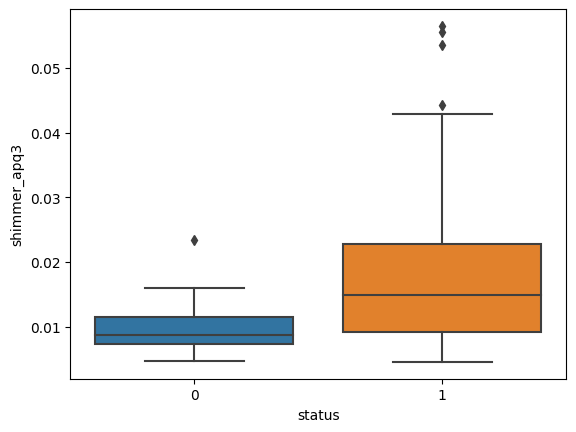

In [77]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

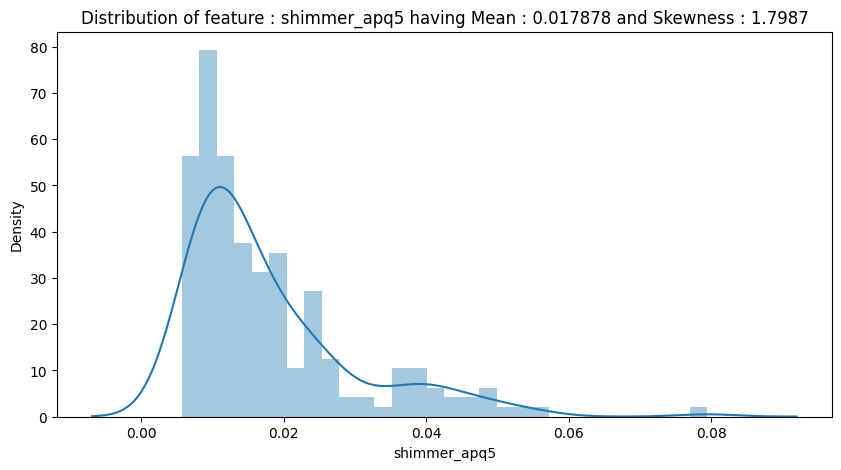

In [78]:
feature = 'shimmer_apq5'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

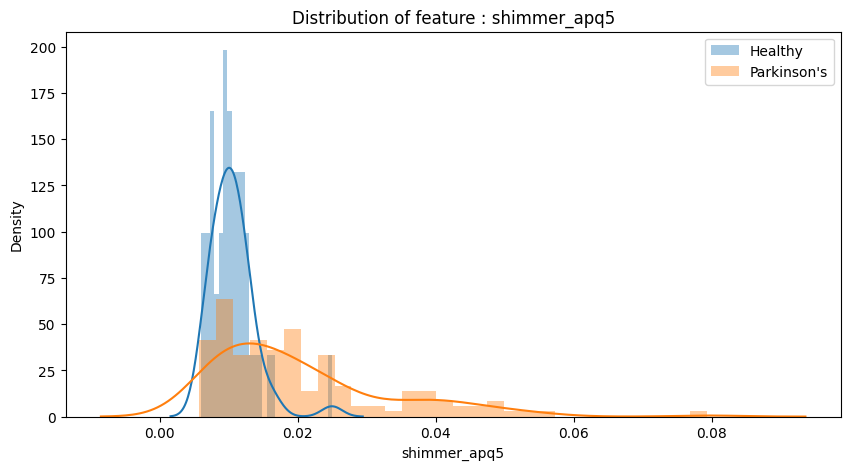

In [79]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status                0           1
shimmer_apq5                       
0.00-0.01     41.818182   58.181818
0.01-0.02     27.906977   72.093023
0.02-0.03      3.846154   96.153846
0.03-0.04      0.000000  100.000000
0.04-0.05      0.000000  100.000000
0.05-0.06      0.000000  100.000000
0.06-0.08      0.000000  100.000000


Text(0.5, 1.0, 'PD status with different shimmer_apq5 group')

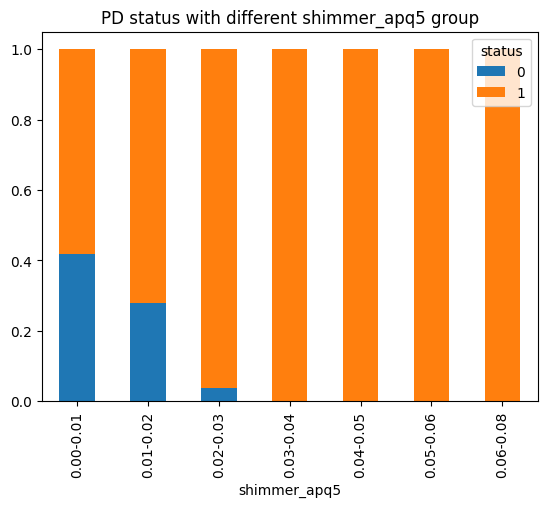

In [80]:
bins = [0.00, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08]                                         # defining shimmer_apq5 bins,
# defining labels of shimmer_apq5 groups as per bins defined as above
shimmer_apq5_group = ['0.00-0.01', '0.01-0.02', '0.02-0.03', '0.03-0.04', '0.04-0.05', '0.05-0.06', '0.06-0.08']
pdData_shimmer_apq5_bin = pd.cut(pdData[feature],bins,labels=shimmer_apq5_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to shimmer_apq5_group_col variable
shimmer_apq5_group_col = pd.crosstab(pdData_shimmer_apq5_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(shimmer_apq5_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
shimmer_apq5_group_col.div(shimmer_apq5_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different shimmer_apq5 group")                     # setting title of the figure

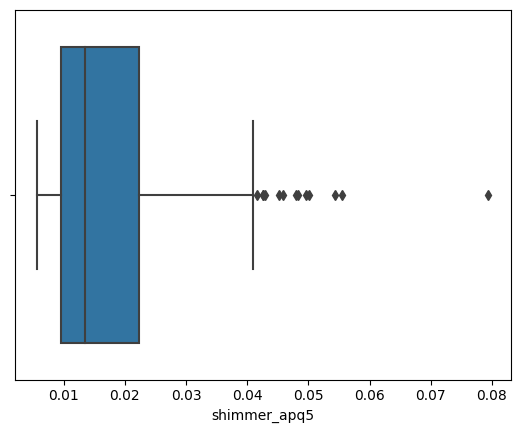

In [81]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

In [82]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature shimmer_apq5 : Mean = 0.017878, Median = 0.01347 and Inter-Quartile-Range (IQR) = 0.0128

*****************************************************************************************************************************
There are 13 outliers (6.667 % of the data points) in shimmer_apq5 feature and the values are [0.04518, 0.04825, 0.04159, 0.04254, 0.04282, 0.04962, 0.04791, 0.05005, 0.05426, 0.0458, 0.04265, 0.0794, 0.05556]
*****************************************************************************************************************************


<Axes: xlabel='status', ylabel='shimmer_apq5'>

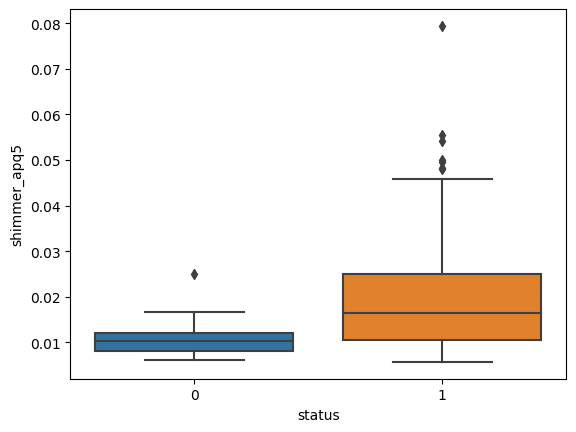

In [83]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

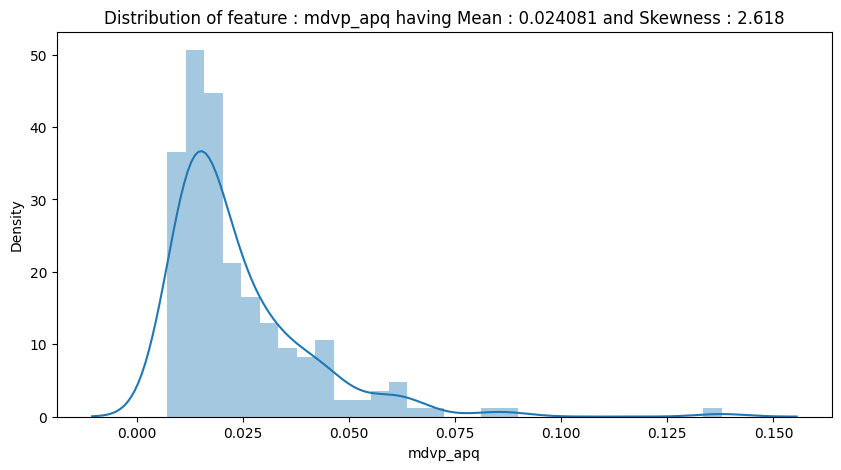

In [84]:
feature = 'mdvp_apq'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

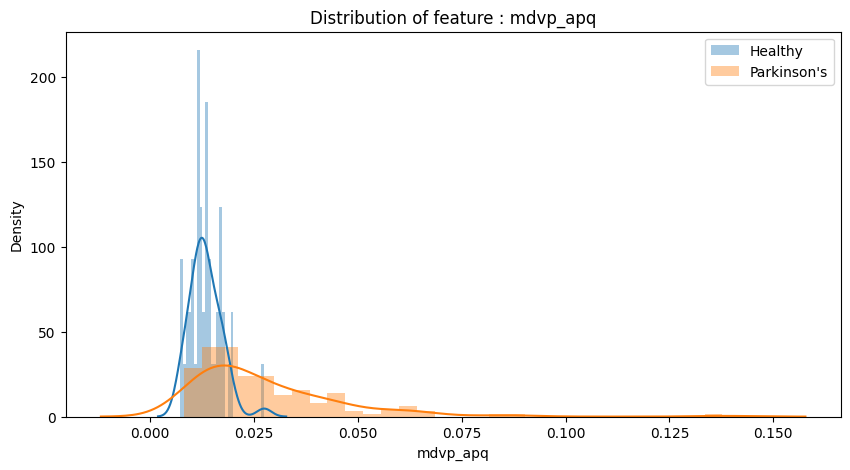

In [85]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status             0           1
mdvp_apq                        
0.00-0.02  42.727273   57.272727
0.02-0.04   1.754386   98.245614
0.04-0.06   0.000000  100.000000
0.06-0.08   0.000000  100.000000
0.08-0.10   0.000000  100.000000
0.10-0.14   0.000000  100.000000


Text(0.5, 1.0, 'PD status with different mdvp_apq group')

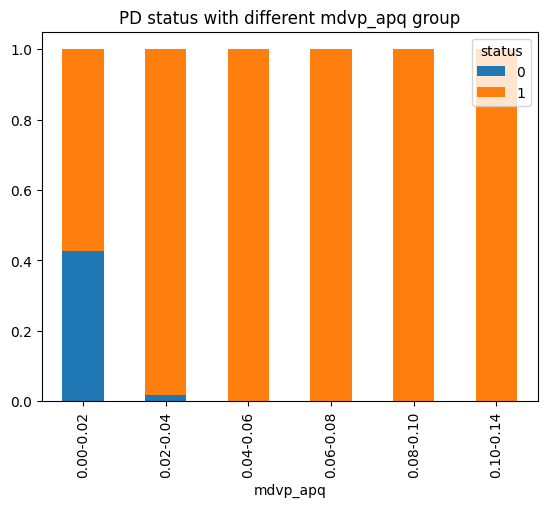

In [86]:
bins = [0.00, 0.02, 0.04, 0.06, 0.08, 0.10, 0.14]                                         # defining mdvp_apq bins,
# defining labels of mdvp_apq groups as per bins defined as above
mdvp_apq_group = ['0.00-0.02', '0.02-0.04', '0.04-0.06', '0.06-0.08', '0.08-0.10', '0.10-0.14']
pdData_mdvp_apq_bin = pd.cut(pdData[feature],bins,labels=mdvp_apq_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_apq_group_col variable
mdvp_apq_group_col = pd.crosstab(pdData_mdvp_apq_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_apq_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_apq_group_col.div(mdvp_apq_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_apq group")                     # setting title of the figure

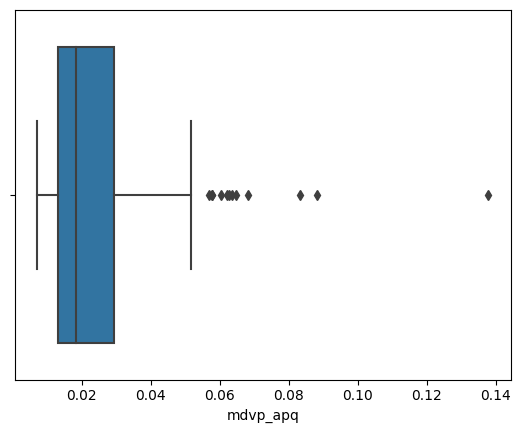

In [87]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

In [88]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature mdvp_apq : Mean = 0.024081, Median = 0.01826 and Inter-Quartile-Range (IQR) = 0.01632

*****************************************************************************************************************************
There are 12 outliers (6.154 % of the data points) in mdvp_apq feature and the values are [0.05767, 0.0569, 0.05783, 0.06196, 0.06023, 0.08808, 0.06359, 0.06824, 0.0646, 0.06259, 0.13778, 0.08318]
*****************************************************************************************************************************


<Axes: xlabel='status', ylabel='mdvp_apq'>

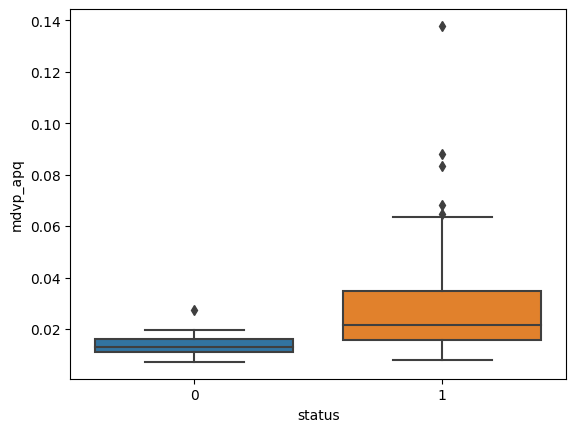

In [89]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

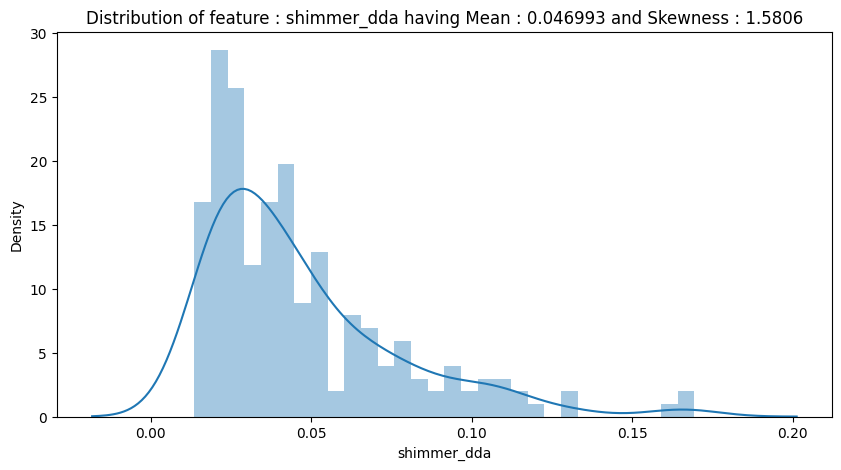

In [90]:
feature = 'shimmer_dda'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

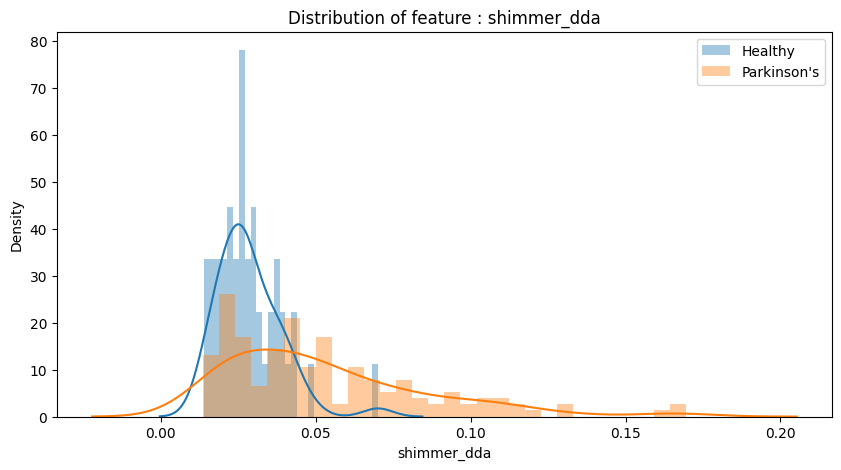

In [91]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status               0           1
shimmer_dda                       
0.010-0.025  37.254902   62.745098
0.025-0.050  35.000000   65.000000
0.050-0.075   3.030303   96.969697
0.075-0.100   0.000000  100.000000
0.100-0.125   0.000000  100.000000
0.125-0.150   0.000000  100.000000


Text(0.5, 1.0, 'PD status with different shimmer_dda group')

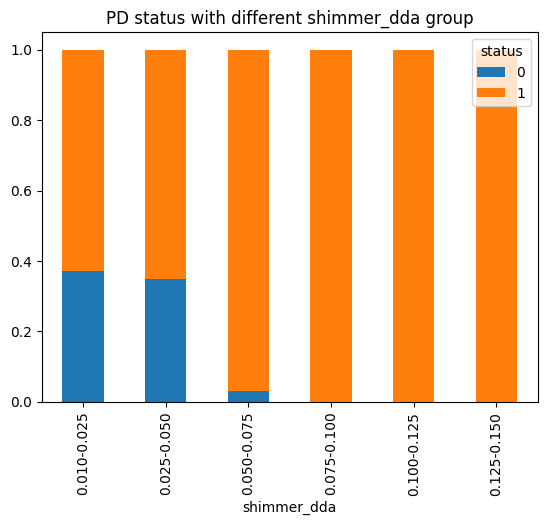

In [92]:
bins = [0.010, 0.025, 0.050, 0.075, 0.100, 0.125, 0.150]                                         # defining shimmer_dda bins,
# defining labels of shimmer_dda groups as per bins defined as above
shimmer_dda_group = ['0.010-0.025', '0.025-0.050', '0.050-0.075', '0.075-0.100', '0.100-0.125', '0.125-0.150']
pdData_shimmer_dda_bin = pd.cut(pdData[feature],bins,labels=shimmer_dda_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to shimmer_dda_group_col variable
shimmer_dda_group_col = pd.crosstab(pdData_shimmer_dda_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(shimmer_dda_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
shimmer_dda_group_col.div(shimmer_dda_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different shimmer_dda group")                     # setting title of the figure

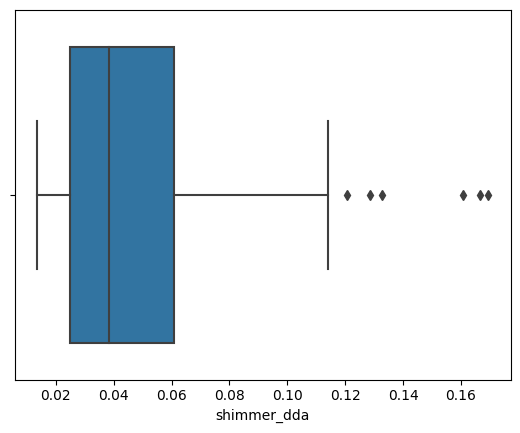

In [93]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

In [94]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature shimmer_dda : Mean = 0.046993, Median = 0.03836 and Inter-Quartile-Range (IQR) = 0.03606

*****************************************************************************************************************************
There are 6 outliers (3.077 % of the data points) in shimmer_dda feature and the values are [0.13262, 0.16074, 0.16654, 0.12047, 0.16942, 0.12851]
*****************************************************************************************************************************


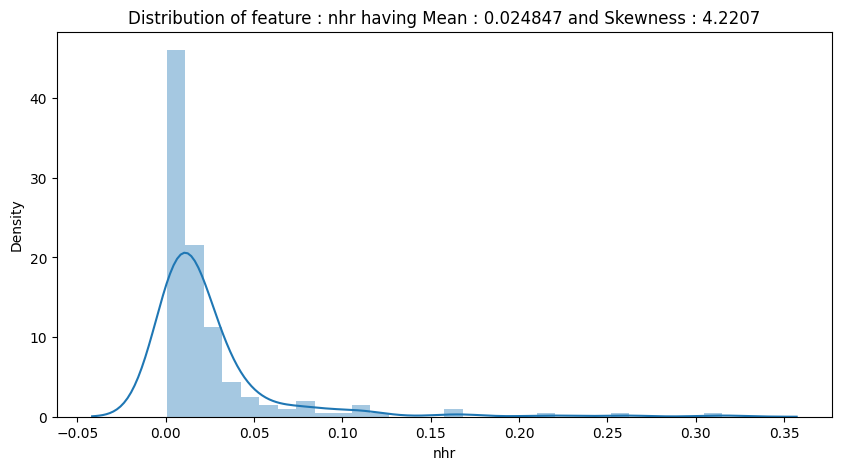

In [95]:
feature = 'nhr'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

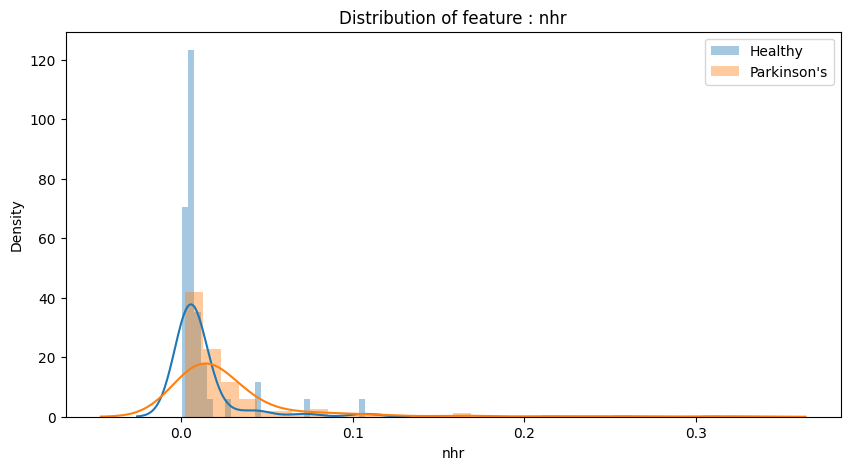

In [96]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status             0           1
nhr                             
0.00-0.05  26.285714   73.714286
0.05-0.10  10.000000   90.000000
0.10-0.15  20.000000   80.000000
0.15-0.20   0.000000  100.000000
0.20-0.25   0.000000  100.000000
0.25-0.32   0.000000  100.000000


Text(0.5, 1.0, 'PD status with different nhr group')

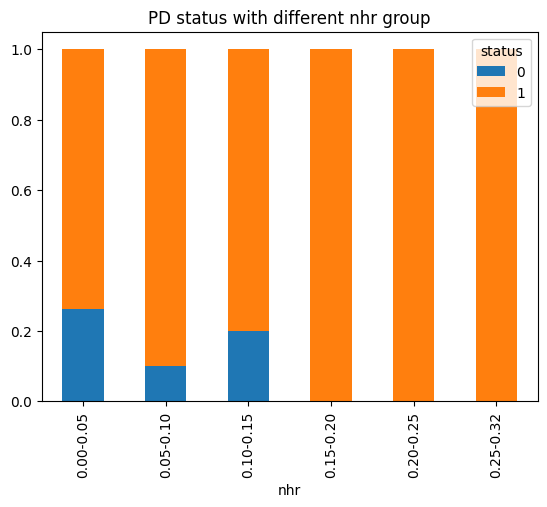

In [97]:
bins = [0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.32]                                         # defining nhr bins,
# defining labels of nhr groups as per bins defined as above
nhr_group = ['0.00-0.05', '0.05-0.10', '0.10-0.15', '0.15-0.20', '0.20-0.25', '0.25-0.32']
pdData_nhr_bin = pd.cut(pdData[feature],bins,labels=nhr_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to nhr_group_col variable
nhr_group_col = pd.crosstab(pdData_nhr_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(nhr_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
nhr_group_col.div(nhr_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different nhr group")                     # setting title of the figure

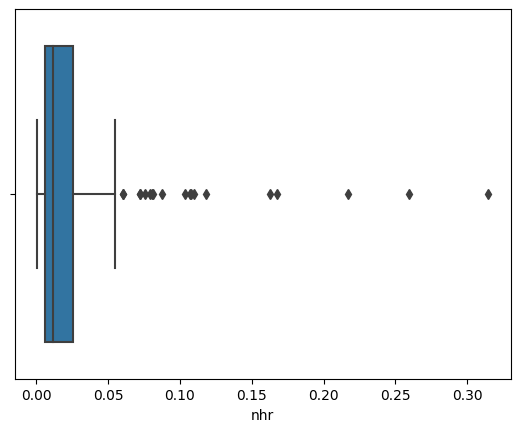

In [98]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

In [99]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature nhr : Mean = 0.024847, Median = 0.01166 and Inter-Quartile-Range (IQR) = 0.019715

*****************************************************************************************************************************
There are 19 outliers (9.744 % of the data points) in nhr feature and the values are [0.07223, 0.08725, 0.08151, 0.10323, 0.16744, 0.31482, 0.11843, 0.2593, 0.06051, 0.0753, 0.06057, 0.08069, 0.07889, 0.10952, 0.21713, 0.16265, 0.10748, 0.10715, 0.07223]
*****************************************************************************************************************************


<Axes: xlabel='status', ylabel='nhr'>

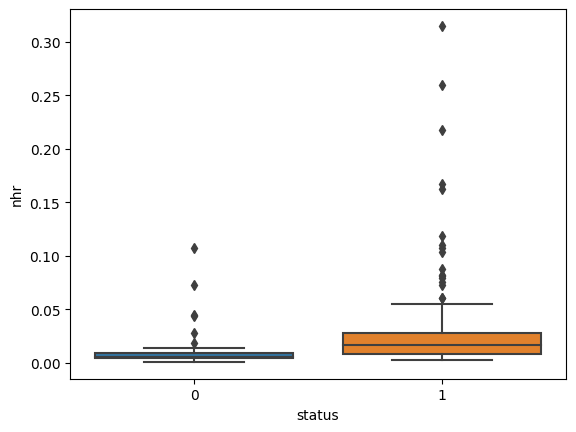

In [100]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

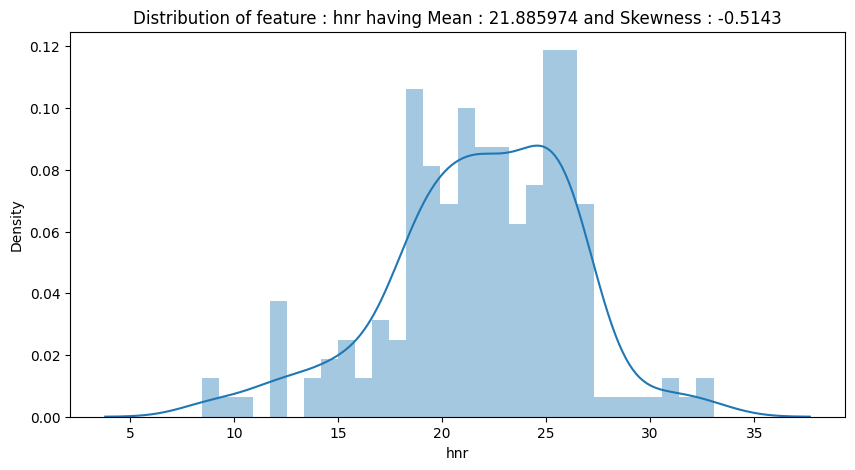

In [101]:
feature = 'hnr'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

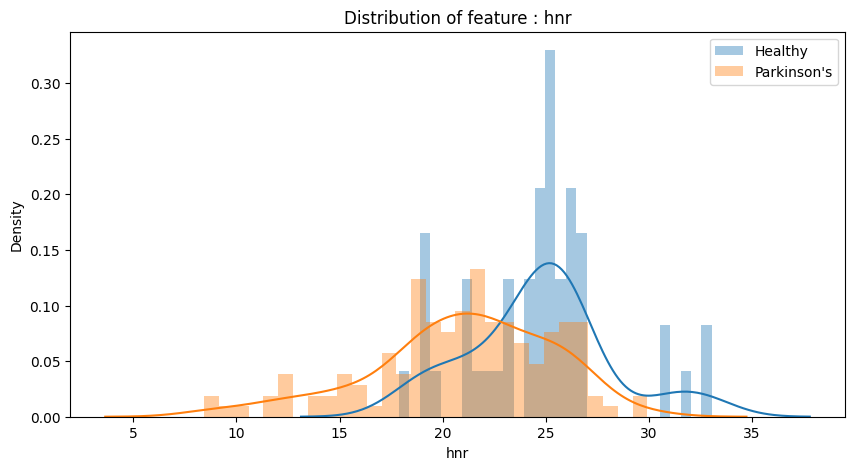

In [102]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status           0           1
hnr                           
8-10      0.000000  100.000000
10-15     0.000000  100.000000
15-20    13.043478   86.956522
20-25    22.222222   77.777778
25-30    39.583333   60.416667
30-34   100.000000    0.000000


Text(0.5, 1.0, 'PD status with different hnr group')

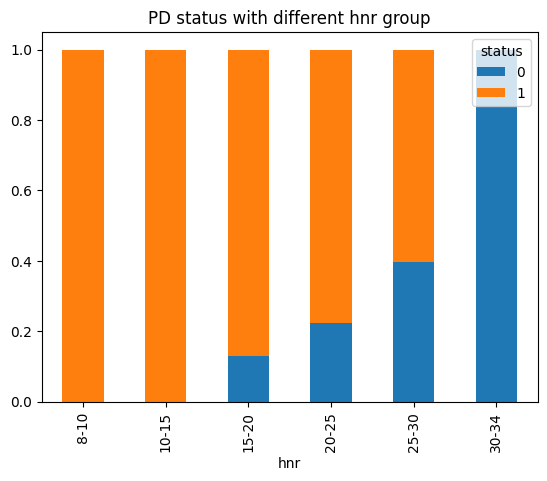

In [103]:
bins = [8, 10, 15, 20, 25 , 30, 34]                                         # defining hnr bins,
# defining labels of hnr groups as per bins defined as above
hnr_group = ['8-10', '10-15', '15-20', '20-25', '25-30', '30-34']
pdData_hnr_bin = pd.cut(pdData[feature],bins,labels=hnr_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to hnr_group_col variable
hnr_group_col = pd.crosstab(pdData_hnr_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(hnr_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
hnr_group_col.div(hnr_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different hnr group")                     # setting title of the figure

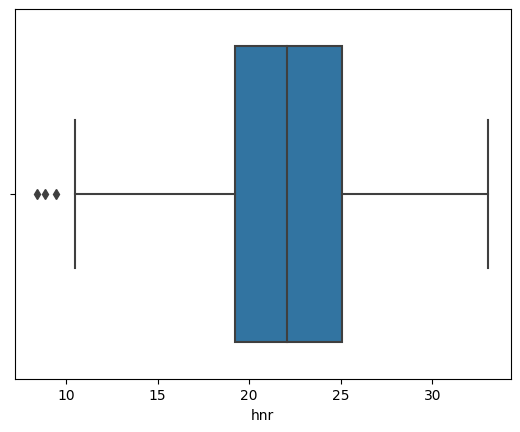

In [104]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

In [105]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature hnr : Mean = 21.885974, Median = 22.085 and Inter-Quartile-Range (IQR) = 5.8775

*****************************************************************************************************************************
There are 3 outliers (1.538 % of the data points) in hnr feature and the values are [8.867, 8.441, 9.449]
*****************************************************************************************************************************


<Axes: xlabel='status', ylabel='hnr'>

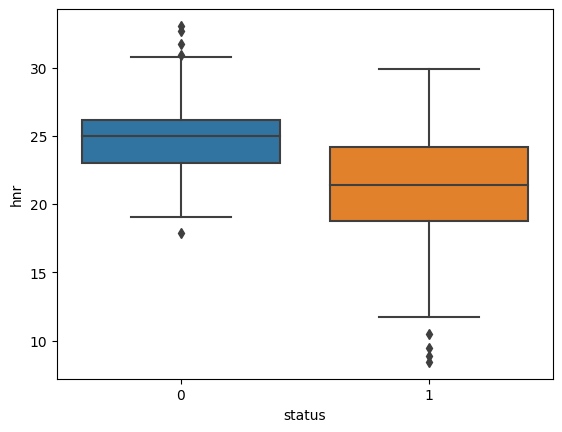

In [106]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

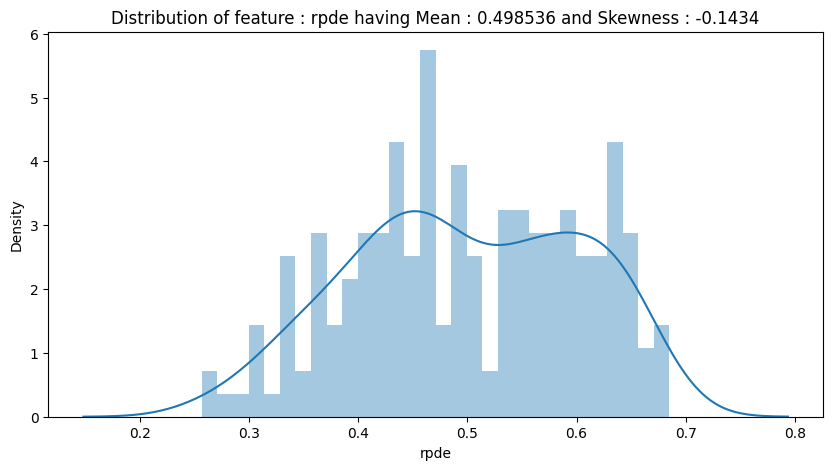

In [107]:
feature = 'rpde'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

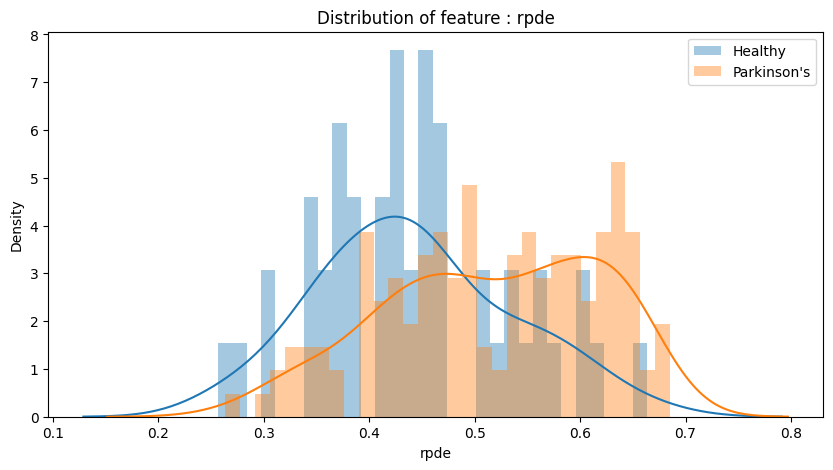

In [108]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status             0          1
rpde                           
0.25-0.35  41.176471  58.823529
0.35-0.45  41.176471  58.823529
0.45-0.55  21.428571  78.571429
0.55-0.65  11.864407  88.135593
0.65-0.75   8.333333  91.666667


Text(0.5, 1.0, 'PD status with different rpde group')

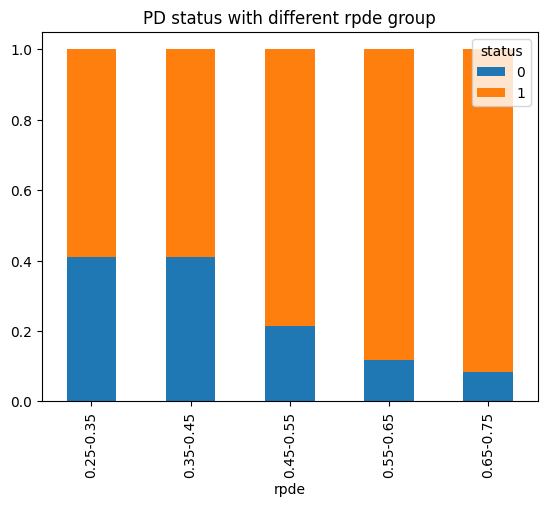

In [109]:
bins = [0.25, 0.35, 0.45, 0.55, 0.65, 0.75]                                         # defining rpde bins,
# defining labels of rpde groups as per bins defined as above
rpde_group = ['0.25-0.35', '0.35-0.45', '0.45-0.55', '0.55-0.65', '0.65-0.75']
pdData_rpde_bin = pd.cut(pdData[feature],bins,labels=rpde_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to rpde_group_col variable
rpde_group_col = pd.crosstab(pdData_rpde_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(rpde_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
rpde_group_col.div(rpde_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different rpde group")                     # setting title of the figure

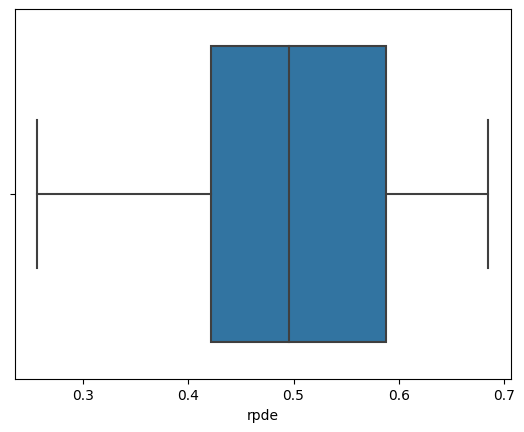

In [110]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

<Axes: xlabel='status', ylabel='rpde'>

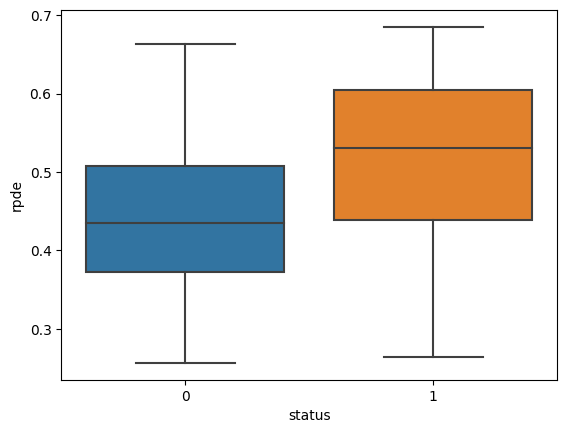

In [111]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

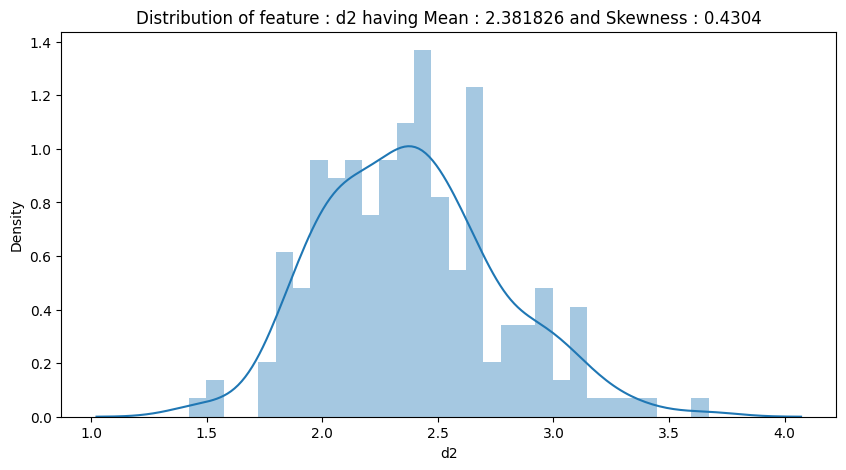

In [112]:
feature = 'd2'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

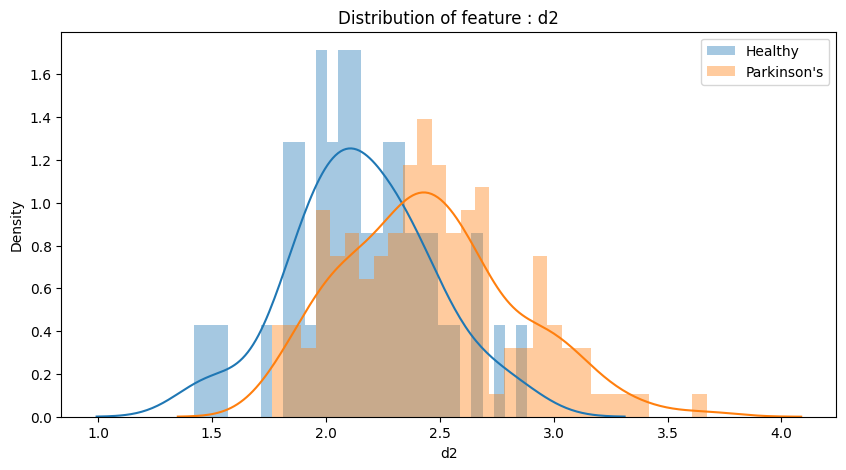

In [113]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status            0           1
d2                             
1.0-1.5  100.000000    0.000000
1.5-2.0   44.444444   55.555556
2.0-2.5   29.411765   70.588235
2.5-3.0    9.615385   90.384615
3.0-3.7    0.000000  100.000000


Text(0.5, 1.0, 'PD status with different d2 group')

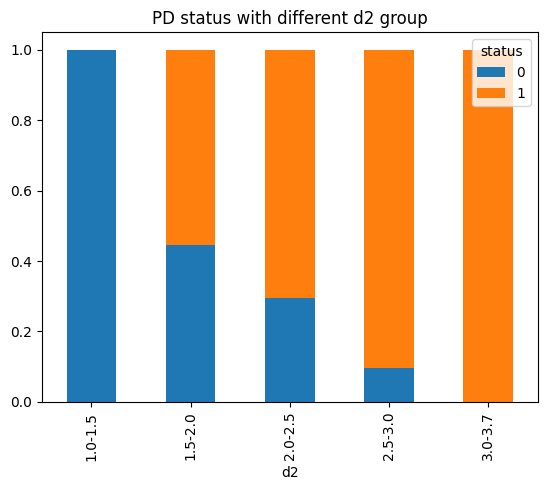

In [114]:
bins = [1.0, 1.5, 2.0, 2.5, 3.0, 3.7]                                         # defining d2 bins,
# defining labels of d2 groups as per bins defined as above
d2_group = ['1.0-1.5', '1.5-2.0', '2.0-2.5', '2.5-3.0', '3.0-3.7']
pdData_d2_bin = pd.cut(pdData[feature],bins,labels=d2_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to d2_group_col variable
d2_group_col = pd.crosstab(pdData_d2_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(d2_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
d2_group_col.div(d2_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different d2 group")                     # setting title of the figure

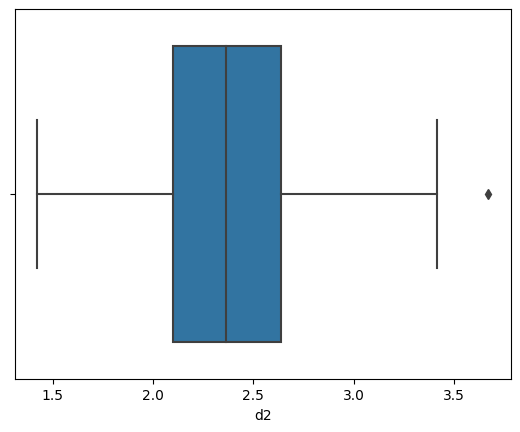

In [115]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

In [116]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature d2 : Mean = 2.381826, Median = 2.361532 and Inter-Quartile-Range (IQR) = 0.53733

*****************************************************************************************************************************
There are 1 outliers (0.513 % of the data points) in d2 feature and the values are [3.671155]
*****************************************************************************************************************************


<Axes: xlabel='status', ylabel='d2'>

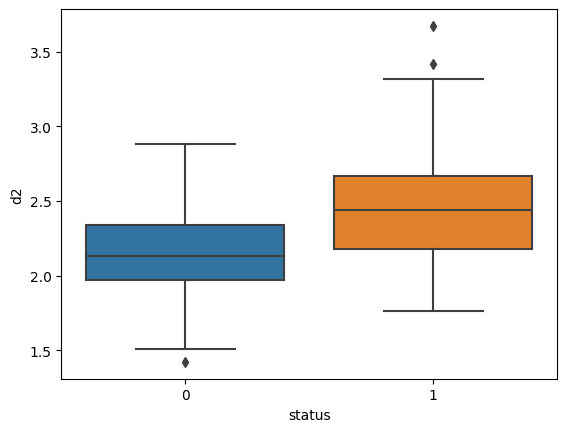

In [117]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

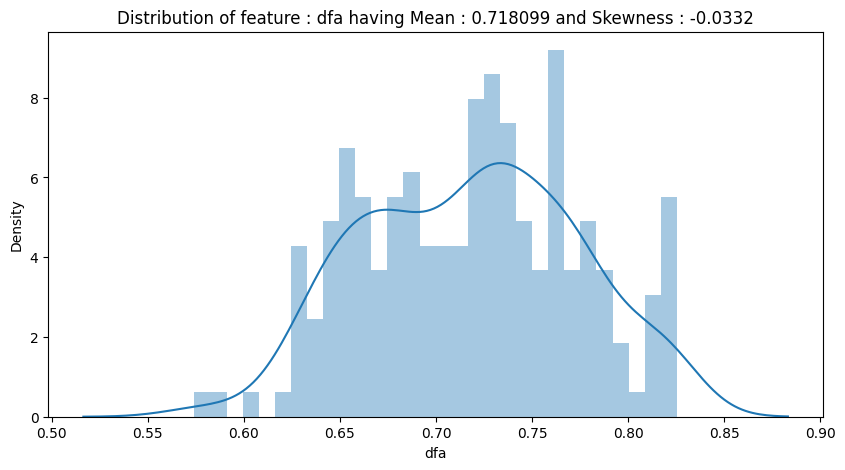

In [118]:
feature = 'dfa'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

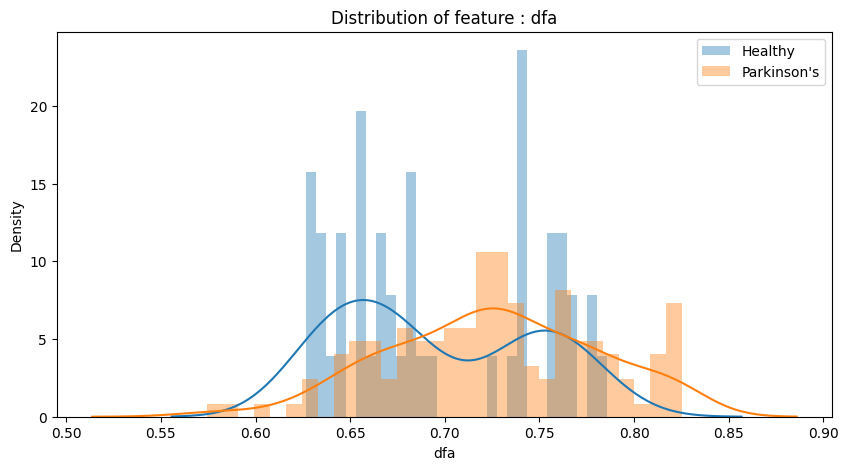

In [119]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status           0           1
dfa                           
0.5-0.6   0.000000  100.000000
0.6-0.7  39.189189   60.810811
0.7-0.8  18.269231   81.730769
0.8-0.9   0.000000  100.000000


Text(0.5, 1.0, 'PD status with different dfa group')

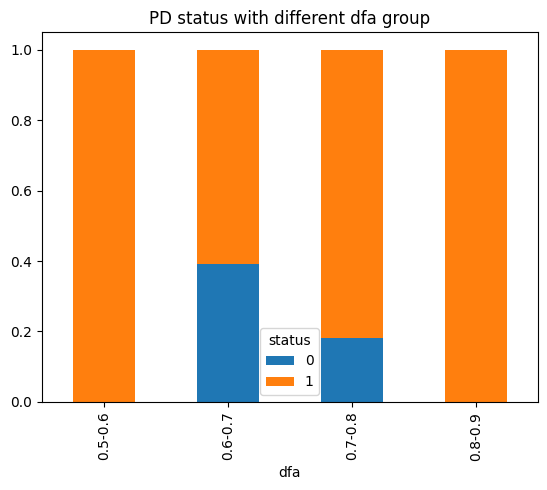

In [120]:
bins = [0.5, 0.6, 0.7, 0.8, 0.9]                                         # defining dfa bins,
# defining labels of dfa groups as per bins defined as above
dfa_group = ['0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9']
pdData_dfa_bin = pd.cut(pdData[feature],bins,labels=dfa_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to dfa_group_col variable
dfa_group_col = pd.crosstab(pdData_dfa_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(dfa_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
dfa_group_col.div(dfa_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different dfa group")                     # setting title of the figure

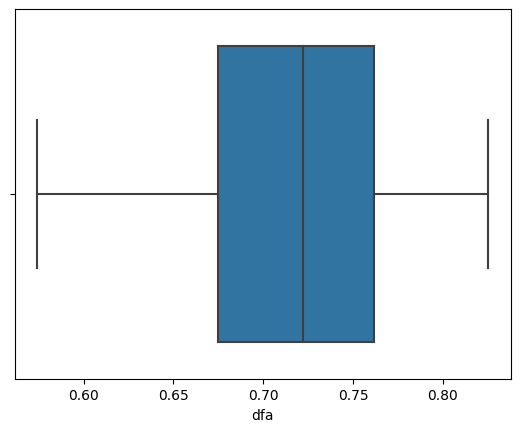

In [121]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

<Axes: xlabel='status', ylabel='dfa'>

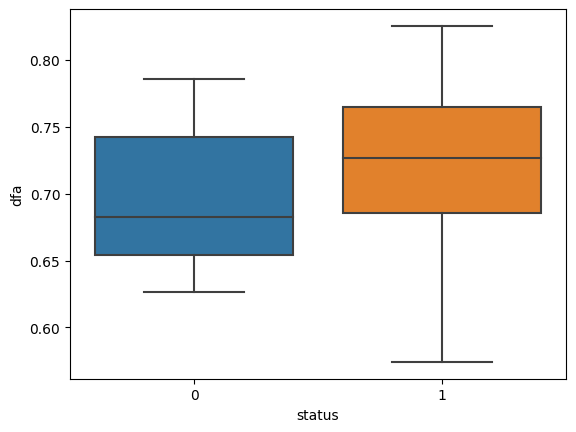

In [122]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

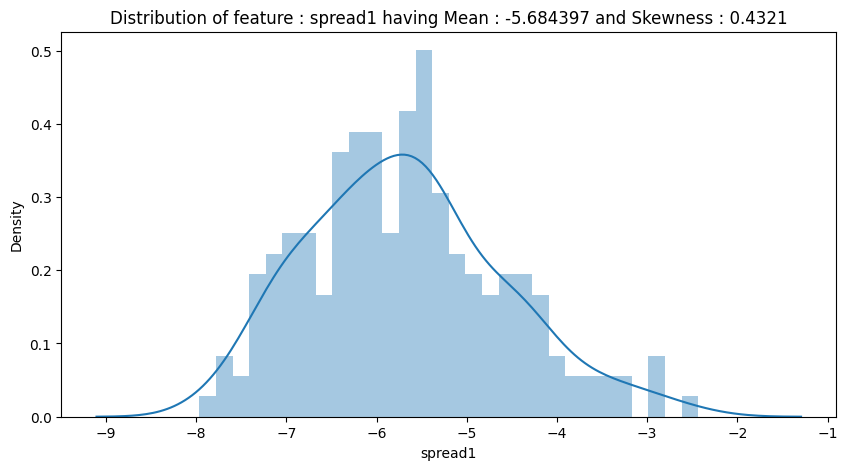

In [123]:
feature = 'spread1'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

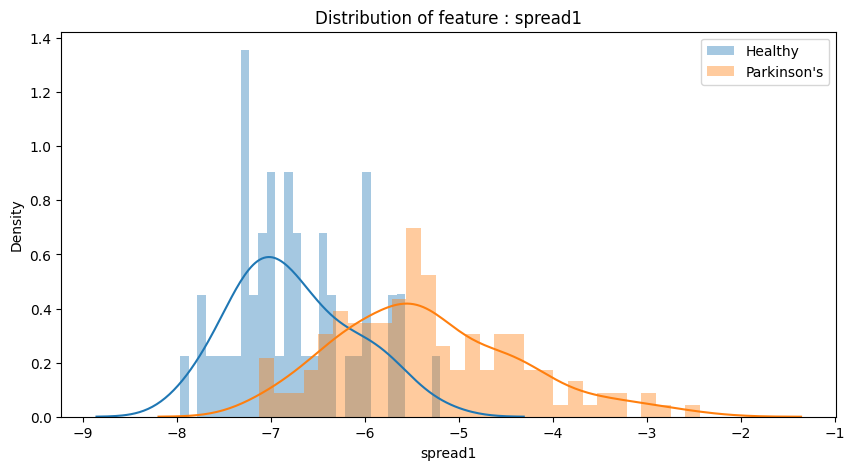

In [124]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status           0           1
spread1                       
-8 : -6  50.617284   49.382716
-6 : -4   6.930693   93.069307
-4 : -2   0.000000  100.000000


Text(0.5, 1.0, 'PD status with different spread1 group')

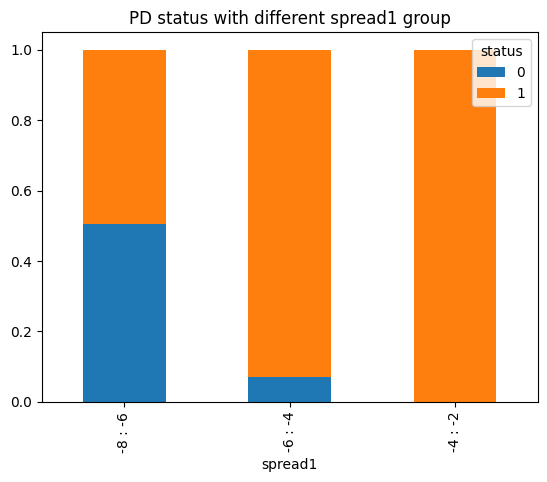

In [125]:
bins = [-8,-6,-4,-2]                                         # defining spread1 bins,
# defining labels of spread1 groups as per bins defined as above
spread1_group = ['-8 : -6', '-6 : -4', '-4 : -2']
pdData_spread1_bin = pd.cut(pdData[feature],bins,labels=spread1_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to spread1_group_col variable
spread1_group_col = pd.crosstab(pdData_spread1_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(spread1_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
spread1_group_col.div(spread1_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different spread1 group")                     # setting title of the figure

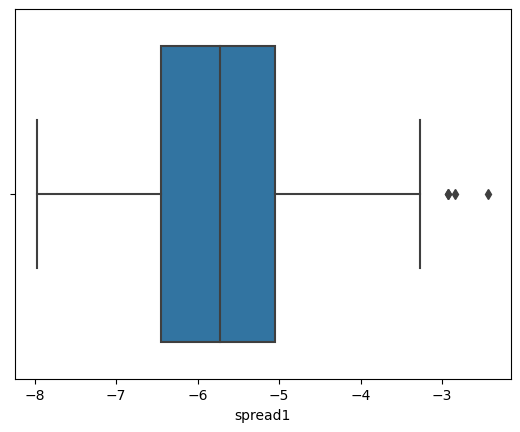

In [126]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

In [127]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature spread1 : Mean = -5.684397, Median = -5.720868 and Inter-Quartile-Range (IQR) = 1.403904

*****************************************************************************************************************************
There are 4 outliers (2.051 % of the data points) in spread1 feature and the values are [-2.93107, -2.434031, -2.839756, -2.929379]
*****************************************************************************************************************************


<Axes: xlabel='status', ylabel='spread1'>

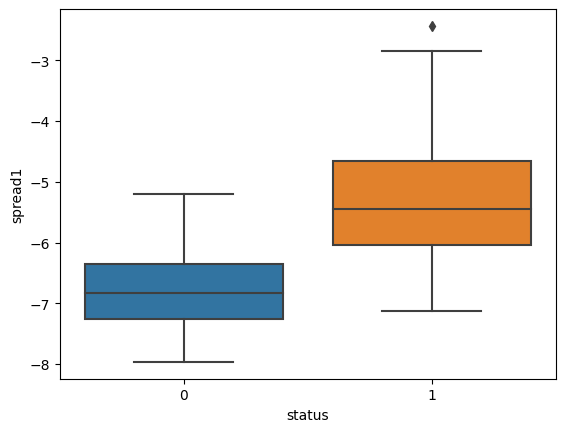

In [128]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

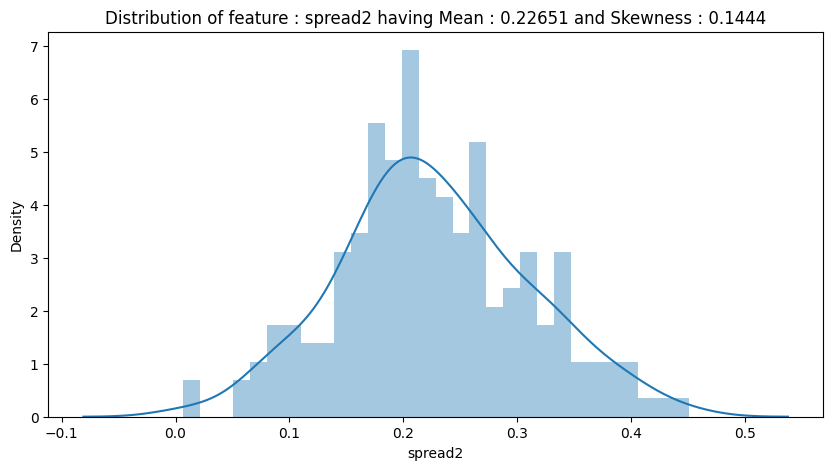

In [129]:
feature = 'spread2'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

<Figure size 1000x500 with 0 Axes>

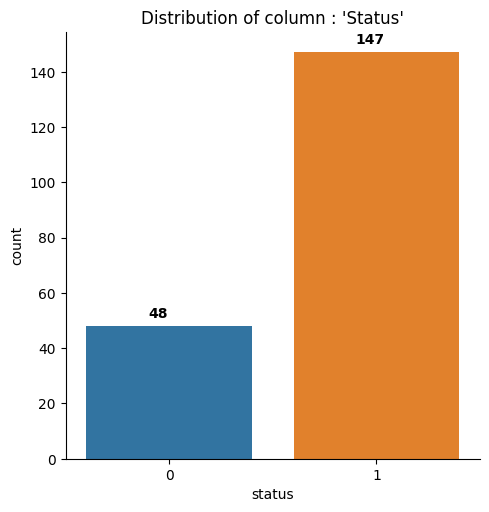

In [130]:
plt.figure(figsize=(10,5))                                 # setting figure size with width = 10 and height = 5
# seaborn count catplot to examine distribution of the status
ax = sns.catplot(x='status', kind="count", data=pdData)
plt.title("Distribution of column : 'Status'")      # setting title of the figure
y = []                                                     # creating a null or empty array
for val in range(pdData.status.nunique()):        # looping for number of unique values in the status
    # appending count of each unique values from status to array y
    y.append(pdData.groupby(pdData.status,sort=False)['status'].count()[val])
for i, v in enumerate(y):                                  # looping count of each unique value in the status
    # including count of each unique values in the plot
    plt.annotate(str(v), xy=(i,float(v)), xytext=(i-0.1, v+3), color='black', fontweight='bold')

Text(0.5, 1.0, "Distribution of column : 'status'")

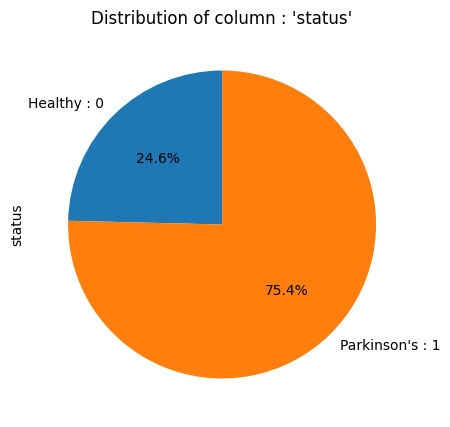

In [131]:
plt.figure(figsize=(5,5))                               # setting figure size with width = 10 and height = 5
# seaborn pie chart to examine distribution of the status
pdData.groupby(['status']).status.count().plot(kind='pie',labels=['Healthy : 0','Parkinson\'s : 1'],
                                                               startangle=90, autopct='%1.1f%%')
plt.title("Distribution of column : 'status'")   # setting title of the figure

In [ ]:
sns.pairplot(pdData,hue='status',diag_kind='hist')

In [ ]:
plt.figure(figsize=(20, 7))

# Select only numeric columns for correlation
numeric_pdData = pdData.select_dtypes(include=['number'])

# Create a mask to show correlation values only once
mask = np.zeros_like(numeric_pdData.corr())
mask[np.triu_indices_from(mask, 1)] = True

# Plot heatmap
a = sns.heatmap(numeric_pdData.corr(), mask=mask, annot=True, fmt='.2f')

# Rotate x-axis labels
a.set_xticklabels(a.get_xticklabels(), rotation=90)


# 🧩 Split Dataset into Training and Test Sets

<div style="background-color:#F5FBFF; padding:20px; border-radius:1.3em; font-family:verdana; font-size:20px; line-height:1.7em; border-left:8px solid #3498DB;"> <p> Splitting the dataset into <strong>training</strong> and <strong>test</strong> subsets is a fundamental step in building reliable machine learning models. It ensures that the model is trained on one portion of the data and evaluated on unseen samples to test its generalization ability. </p> <ul> <li>Use <code>train_test_split()</code> from <code>sklearn.model_selection</code> to divide the dataset.</li> <li>Typically allocate <strong>80%</strong> of data for training and <strong>20%</strong> for testing.</li> <li>Set a <code>random_state</code> value for reproducibility of results.</li> <li>Ensure that both sets maintain the same <strong>feature distributions</strong> for balanced evaluation.</li> <li>Store resulting datasets as <code>X_train</code>, <code>X_test</code>, <code>y_train</code>, and <code>y_test</code>.</li> </ul> <p> This division helps prevent <strong>overfitting</strong> and provides a clear picture of how the model performs on new, unseen data — a key indicator of real-world effectiveness. </p> </div>

In [ ]:
#Split the data into training and test set in the ratio of 70:30 respectively
X = pdData.drop(['status'],axis=1)
y = pdData['status']

# split data into train subset and test subset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

# checking the dimensions of the train & test subset
# printing dimension of train set
print(X_train.shape)
# printing dimension of test set
print(X_test.shape)

In [ ]:

print(X_train.shape)
# printing dimension of test set
print(X_test.shape)

In [ ]:
# Let us scale train as well as test data using StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

A. Logistic Regression:

**Logistic Regression Model Training & Evaluation**

🏋️ Train the Logistic Regression model on the scaled training dataset (X_train_scaled, y_train).

🔍 Predict the target (status) for the scaled test set (X_test_scaled).

📊 Evaluate performance with confusion matrix and classification report (precision, recall, F1-score, accuracy).

In [ ]:

# Train Logistic Regression model
lr = LogisticRegression(random_state=0, max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Predict on test set
lr_y_pred = lr.predict(X_test_scaled)

# Print results
print("Confusion Matrix : Logistic Regression")
print(confusion_matrix(y_test, lr_y_pred))
print("\nClassification Report : Logistic Regression")
print(classification_report(y_test, lr_y_pred, digits=2))


**Logistic Regression Model Training & Evaluation**

🏋️ Train the Logistic Regression model on the scaled training dataset (X_train_scaled, y_train).

🔍 Predict the target (status) for the scaled test set (X_test_scaled).

📊 Evaluate performance with confusion matrix and classification report (precision, recall, F1-score, accuracy).

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get probability scores for the positive class
lr_y_prob = lr.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, lr_y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Train the SVM Model with probability estimates enabled
svm = SVC(kernel='rbf', probability=True, random_state=0)
svm.fit(X_train_scaled, y_train)

# Predict status for X_test_scaled dataset
svm_y_pred = svm.predict(X_test_scaled)

# Confusion Matrix for SVM Model
print("Confusion Matrix : SVM")
print(confusion_matrix(y_test, svm_y_pred))

# Classification Report for SVM Model
classRep = classification_report(y_test, svm_y_pred, digits=2)
print(classRep)

# Compute ROC Curve and AUC
svm_y_prob = svm.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class
fpr, tpr, _ = roc_curve(y_test, svm_y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Train the Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_scaled, y_train)

# Predict status for X_test_scaled dataset
rf_y_pred = rf.predict(X_test_scaled)

# Confusion Matrix for Random Forest Model
print("Confusion Matrix : Random Forest")
print(confusion_matrix(y_test, rf_y_pred))

# Classification Report for Random Forest Model
classRep = classification_report(y_test, rf_y_pred, digits=2)
print(classRep)

# Compute ROC Curve and AUC
rf_y_prob = rf.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class
fpr, tpr, _ = roc_curve(y_test, rf_y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Train the Gradient Boosting Model
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train_scaled, y_train)

# Predict status for X_test_scaled dataset
gb_y_pred = gb.predict(X_test_scaled)

# Confusion Matrix for Gradient Boosting Model
print("Confusion Matrix : Gradient Boosting")
print(confusion_matrix(y_test, gb_y_pred))

# Classification Report for Gradient Boosting Model
classRep = classification_report(y_test, gb_y_pred, digits=2)
print(classRep)

# Compute ROC Curve and AUC
gb_y_prob = gb.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class
fpr, tpr, _ = roc_curve(y_test, gb_y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Train the XGBoost Model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=0, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)

# Predict status for X_test_scaled dataset
xgb_y_pred = xgb_model.predict(X_test_scaled)

# Confusion Matrix for XGBoost Model
print("Confusion Matrix : XGBoost")
print(confusion_matrix(y_test, xgb_y_pred))

# Classification Report for XGBoost Model
classRep = classification_report(y_test, xgb_y_pred, digits=2)
print(classRep)

# Compute ROC Curve and AUC
xgb_y_prob = xgb_model.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class
fpr, tpr, _ = roc_curve(y_test, xgb_y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Performance Evaluation of Stacking Ensemble Model for Parkinson’s Disease Detection

Confusion Matrix – shows the counts of true positives, true negatives, false positives, and false negatives.

Classification Report – provides precision, recall, F1-score, and overall accuracy.

ROC Curve and AUC – illustrates the trade-off between True Positive Rate (sensitivity) and False Positive Rate (1-specificity). The Area Under the Curve (AUC) quantifies the model’s discriminative ability.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

# Data Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Base Models with Hyperparameter Tuning
rf = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=0)
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=0)
xgb = XGBClassifier(n_estimators=200, max_depth=7, learning_rate=0.05, use_label_encoder=False, eval_metric='logloss', random_state=0)
svm = SVC(kernel='rbf', C=10, probability=True, random_state=0)  # SVM with Radial Basis Function
lr = LogisticRegression(C=1, solver='liblinear', random_state=0)

# Stacking Classifier (Advanced Ensemble)
stacking = StackingClassifier(
    estimators=[('RF', rf), ('GB', gb), ('XGB', xgb), ('SVM', svm)],
    final_estimator=LogisticRegression(),
    stack_method='auto'
)

# Train Ensemble Model
stacking.fit(X_train_scaled, y_train)

# Predictions
stacking_y_pred = stacking.predict(X_test_scaled)
accuracy = accuracy_score(y_test, stacking_y_pred)

# Print Accuracy
print(f"Stacking Ensemble Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
print("Confusion Matrix : Stacking Ensemble Model")
print(confusion_matrix(y_test, stacking_y_pred))

# Classification Report
classRep = classification_report(y_test, stacking_y_pred, digits=2)
print(classRep)

# Compute ROC Curve and AUC
stacking_y_prob = stacking.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, stacking_y_prob)
roc_auc = auc(fpr, tpr)



In [ ]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacking Ensemble Model')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# 🤖 Comparative Analysis of Machine Learning Models for Parkinson's Disease Prediction

<div style="background-color:#F9FFFA; padding:20px; border-radius:1.3em; font-family:verdana; font-size:20px; line-height:1.7em; border-left:8px solid #2ECC71;"> <p> A <strong>comparative analysis</strong> of various machine learning algorithms helps determine which model performs best in predicting <strong>Parkinson’s Disease</strong> based on biomedical voice measurements and statistical features. Each model is evaluated using consistent metrics to ensure fair performance comparison. </p> <ul> <li>Train multiple models such as <strong>Logistic Regression</strong>, <strong>Random Forest</strong>, <strong>Gradient Boosting</strong>, and <strong>Support Vector Machine (SVM)</strong>.</li> <li>Assess each model using metrics like <strong>Accuracy</strong>, <strong>Precision</strong>, <strong>Recall</strong>, and <strong>F1-Score</strong>.</li> <li>Visualize results using <strong>bar charts</strong> or <strong>heatmaps</strong> for easier interpretation.</li> <li>Identify the model that provides the best balance between bias and variance.</li> <li>Analyze potential overfitting by comparing <strong>training vs. testing performance</strong>.</li> <li>Use ensemble strategies if multiple models show complementary strengths.</li> </ul> <p> This analysis provides a data-driven foundation to select the <strong>most robust and accurate model</strong> for early detection and diagnosis of Parkinson’s Disease. </p> </div>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Models
models = {
    "Logistic Regression": LogisticRegression(random_state=0),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=15, random_state=0),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=0),
    "XGBoost": XGBClassifier(n_estimators=200, max_depth=7, learning_rate=0.05, use_label_encoder=False, eval_metric='logloss', random_state=0),
    "SVM": SVC(kernel='rbf', C=10, probability=True, random_state=0),
}

# Train and Evaluate Models
accuracy_scores = {}
roc_curves = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)

    # Get ROC curve values
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_curves[name] = (fpr, tpr, auc(fpr, tpr))

# Stacking Ensemble Model
stacking = StackingClassifier(
    estimators=[('RF', models['Random Forest']), ('GB', models['Gradient Boosting']),
                ('XGB', models['XGBoost']), ('SVM', models['SVM'])],
    final_estimator=LogisticRegression(),
    stack_method='auto'
)
stacking.fit(X_train_scaled, y_train)
stacking_y_pred = stacking.predict(X_test_scaled)
accuracy_scores["Stacking Ensemble"] = accuracy_score(y_test, stacking_y_pred)

# ROC for Stacking Ensemble
stacking_y_prob = stacking.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, stacking_y_prob)
roc_curves["Stacking Ensemble"] = (fpr, tpr, auc(fpr, tpr))

# Print Accuracy Scores
for model, acc in accuracy_scores.items():
    print(f"{model}: {acc * 100:.2f}%")


In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red', 'purple', 'orange', 'black'])
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Model Accuracies")
plt.ylim([0.5, 1])  # Adjust based on dataset accuracy range
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))

for model_name, (fpr, tpr, auc_score) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# 🧾 Conclusion

The Ensemble Learning-Based Parkinson’s Disease Diagnosis System successfully demonstrates the power of combining multiple machine learning models to enhance prediction accuracy and reliability in medical diagnosis. By leveraging ensemble techniques such as Random Forest, Gradient Boosting, and Voting Classifiers, the system provides a more robust and stable approach to detecting Parkinson’s disease compared to individual models.

The experimental results show that ensemble models effectively capture complex, nonlinear relationships between clinical voice measurement features and Parkinson’s disease symptoms. The integration of multiple algorithms ensures improved generalization, reduced variance, and minimized overfitting, which are crucial for real-world healthcare applications.

This project highlights how data-driven ensemble learning can support neurologists and healthcare professionals in early detection, monitoring, and intervention planning for Parkinson’s patients. The system provides a reliable diagnostic tool that can significantly assist in decision-making and medical research.

In conclusion, the proposed framework achieves:

✅ High accuracy and sensitivity in Parkinson’s prediction.

⚙️ Reduced model bias and variance through ensemble integration.

🔒 Scalability for future expansion with additional clinical features or datasets.

🧠 Practical relevance as a decision-support system in medical practice.

With further enhancement using deep learning and federated architectures, this ensemble-based diagnostic system has the potential to become a powerful AI-driven healthcare solution for neurological disorder detection and management.

<center>
    <img src="https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExMXo3ZjUzbG1taXE1eGdkcWNubHkxdTlsNjEzZ2JwY2p2b2hqbTV5aSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9cw/Gz6nYcm8oXE4dFTC8j/giphy.gif" height="100" width="200">
</center>